# Introduction

In this diary I will be experimenting with the concepts learned in MATH 3406 and doing the assigned problems. I will be using the [Julia](https://julialang.org/) programming language. The diary is maintained through a [Jupyter notebook](https://jupyter.org/) which lets me combine prose and code in a user-friendly way.

Julia is similar to MATLAB in some regards. It draws inspiration from dynamic languages like Lisp, Perl, Python, and R. Under the hood, Julia operates on the multiple-dispatch paradigm and supports optional typing.

I decided to use this language because I thought it would be interesting to try it out!

# Basic operations

In [273]:
using LinearAlgebra
using RowEchelon
using BenchmarkTools # For benchmarking, alternative to tic; tac; in MATLAB
using Plots

In [274]:
A = [1 2 3; 4 1 6; 7 8 1]

3×3 Array{Int64,2}:
 1  2  3
 4  1  6
 7  8  1

In [275]:
tr(A)

3

In [276]:
det(A)

104.0

In [277]:
inv(A)

3×3 Array{Float64,2}:
 -0.451923   0.211538    0.0865385
  0.365385  -0.192308    0.0576923
  0.240385   0.0576923  -0.0673077

In [278]:
A * inv(A)

3×3 Array{Float64,2}:
  1.0           0.0          -2.77556e-17
 -2.22045e-16   1.0           0.0
  3.88578e-16  -1.38778e-17   1.0

Note how this is not exactly $I_3$ but is very close to it

In [279]:
rref(A)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

# Solving a linear system

In [280]:
A = [2 1 1; 4 -6 0; -2 7 2]
b = [5, -2, 9]
A\b

3-element Array{Float64,1}:
 1.0
 1.0
 2.0

Lets try it out with a singular matrix

In [281]:
A = [1 2 3; 4 5 6; 7 8 9]
b = [5, -2, 9]
A\b

LoadError: [91mSingularException(3)[39m

Note how Julia throws a `SingularException`. This is because it checks if the matrix is singular before attempting to perform the calculation. Under the hood, Julia uses an $LU$ decomposition for non-triangular square matrices (which it fails to compute becase $A$ is singular).

## LU Decomposition

In [282]:
# Tri-diagonal matrix
A = 
[
    1 -1 0 0;
    -1 2 -1 0;
    0 -1 2 -1;
    0 0 -1 2;
]

F = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
4×4 Array{Float64,2}:
  1.0   0.0   0.0  0.0
 -1.0   1.0   0.0  0.0
  0.0  -1.0   1.0  0.0
  0.0   0.0  -1.0  1.0
U factor:
4×4 Array{Float64,2}:
 1.0  -1.0   0.0   0.0
 0.0   1.0  -1.0   0.0
 0.0   0.0   1.0  -1.0
 0.0   0.0   0.0   1.0

In [283]:
A[F.p, :] == F.L * F.U

true

The above decomposition did not require any row-exchanges.

In [284]:
A = [0 1; 3 4]
F = lu(A)
display(F)
println("p = ", F.p)

LU{Float64,Array{Float64,2}}
L factor:
2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
U factor:
2×2 Array{Float64,2}:
 3.0  4.0
 0.0  1.0

p = [2, 1]


In [285]:
A[F.p, :] == F.L * F.U

true

Note how in the above case, we needed to permuate the original matrix A. The permutation specifically is a row-exchange between $R_1$ and $R_2$

In [286]:
A = [0 0 1; 0 0 2; 0 3 0]
F = lu(A)

LoadError: [91mSingularException(1)[39m

Here we tried to perform an $LU$ decomposition on a singular matrix. Note how Julia raises a `SingularException`. This is because by default Julia checks if the matrix is singular before performing a decomposition. 

However, we know that every matrix admits an $LUP$ decomposition, where $P$ is the permutation matrix. We can disable the checking by passing the `check=false` parameter

In [287]:
F = lu(A, check=false)
display(F.L)
display(F.U)
display(F.P)
display(F)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Array{Float64,2}:
 0.0  0.0  1.0
 0.0  3.0  0.0
 0.0  0.0  2.0

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  0.0  1.0
 0.0  1.0  0.0

Failed factorization of type LU{Float64,Array{Float64,2}}

Here we see the $L$, $U$, and $P$ factors. It even prints a message saying that the factorization failed (which is expected for this example)

## Uniqueness of LU factorization

If the matrix $A$ is square and invertible, then there exists a unique $LU$ decomposition provided we restrict $L$ to be uni-triangular (i.e., 1s on the diagonal).

However, if $A$ is not invertible, we cannot make such a guarantee. Here is an example.

In [288]:
A = [0 1; 0 2]

2×2 Array{Int64,2}:
 0  1
 0  2

$A$ is not singular. Here are two possible $LU$ decompositions:

In [289]:
L1, U1 = lu(A, check=false)
display(L1)
display(U1)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

2×2 Array{Float64,2}:
 0.0  1.0
 0.0  2.0

In [290]:
L2 = [1 0; 3 1]
U2 = [0 1; 0 -1]
display(L2)
display(U2)

2×2 Array{Int64,2}:
 1  0
 3  1

2×2 Array{Int64,2}:
 0   1
 0  -1

In [291]:
L1 * U1 == A

true

In [292]:
L2 * U2 == A

true

# Chapter 1 HW

## Section 1.3

### 30

For this question, I modeled the system as `Ax = b` and used the left division operator `\` to solve it

In [293]:
# part 1

A = [1 1 1; 1 2 2; 2 3 -4]
b = [6, 11, 3]
x = A\b

3-element Array{Float64,1}:
 1.0
 3.0
 2.0

In [294]:
# part 2

A = [1 1 1; 1 2 2; 2 3 -4]
b = [7, 10, 3]
x = A\b

3-element Array{Float64,1}:
 4.0
 1.0
 2.0

### 32

In [295]:
L,U,p = lu(rand(3,3))

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
 1.0        0.0        0.0
 0.0741923  1.0        0.0
 0.290626   0.0993657  1.0
U factor:
3×3 Array{Float64,2}:
 0.388143  0.586009  0.174559
 0.0       0.811973  0.0567718
 0.0       0.0       0.653169

In [296]:
U[p][1,1]

0.3881425807923202

In [297]:
res = [0, 0, 0]
n = 100000

for i = 1:n
    A = rand(3,3)
    L,U,p = lu(A)
    res += abs.(diag(U)[p])
end

res/n

3-element Array{Float64,1}:
 0.5399746585793938
 0.5383458204821956
 0.5377481488088764

The average values for each pivot are about 0.5

## Section 1.4

### 21

In [298]:
A = [0.5 0.5; 0.5 0.5]

println("A^2 = ", A^2)
println("A^3 = ", A^3)

A^2 = [0.5 0.5; 0.5 0.5]
A^3 = [0.5 0.5; 0.5 0.5]


In [299]:
B = [1 0; 0 -1]

println("B^2 = ", B^2)
println("B^3 = ", B^3)

B^2 = [1 0; 0 1]
B^3 = [1 0; 0 -1]


In [300]:
C = A*B
println("C = ", C)
println("C^2 = ", C^2)
println("C^3 = ", C^3)

C = [0.5 -0.5; 0.5 -0.5]
C^2 = [0.0 0.0; 0.0 0.0]
C^3 = [0.0 0.0; 0.0 0.0]


$A^k = A$

$B^k = \begin{bmatrix}
1 & 0 \\
0 & (-1)^k \\
\end{bmatrix}$

$C^k = \left\{\begin{array}{ll}
\begin{bmatrix}
0.5 & -0.5 \\
0.5 & -0.5 \\
\end{bmatrix}
&\mbox{if k=1} \\
\begin{bmatrix}
0 & 0 \\
0 & 0 \\
\end{bmatrix}   &\mbox{otherwise}       
\end{array}
\right.$

$k \in \mathbb{N}$

### 59

In [301]:
A = I(3)

3×3 Diagonal{Bool,Array{Bool,1}}:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

In [302]:
v = [3;4;5]

3-element Array{Int64,1}:
 3
 4
 5

In [303]:
v'

1×3 Adjoint{Int64,Array{Int64,1}}:
 3  4  5

In [304]:
A*v

3-element Array{Int64,1}:
 3
 4
 5

In [305]:
v' * v

50

In [306]:
v*A

LoadError: [91mDimensionMismatch("array could not be broadcast to match destination")[39m

### 60

In [307]:
A = ones(4,4)

4×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [308]:
v = ones(4,1)

4×1 Array{Float64,2}:
 1.0
 1.0
 1.0
 1.0

In [309]:
A * v

4×1 Array{Float64,2}:
 4.0
 4.0
 4.0
 4.0

In [310]:
B = I(4) + ones(4,4)

4×4 Array{Float64,2}:
 2.0  1.0  1.0  1.0
 1.0  2.0  1.0  1.0
 1.0  1.0  2.0  1.0
 1.0  1.0  1.0  2.0

In [311]:
w = zeros(4,1) + 2 * ones(4,1)

4×1 Array{Float64,2}:
 2.0
 2.0
 2.0
 2.0

In [312]:
B * w

4×1 Array{Float64,2}:
 10.0
 10.0
 10.0
 10.0

## Section 1.6

### 12

(a) True

In both cases, we are calculating the inverse of a matrix $A$ using the Gauss-Jordan method.

Case 1: $A$ is upper triangular

Here, $A$ is already in the row-echelon form. We do not need to perform forward elimination. During the first round of backward elimination, we will do a row transformation that substracts a multiple of the last row from the penultimate row. In the last row, the only non-zero entry is the value on the diagonal on both the LHS (if this entry were zero, then $A$ would not be invertible) and RHS (which is the identity matrix). This means that when performing the row transformation, the entries below the diagonal still remain zero, since subtracting zero from a number gives back the number. WLOG, we can apply the same reasoning to conclude that the entries below the diagonal remain zero throughout the entire backward elimination process on both the LHS and RHS. This means that the RHS (which is $A^{-1}$) is upper-triangular.

$\therefore$ $A^{-1}$ is upper-triangular.

Case 2: $A$ is lower triangular

Here, we only need to perform forward elimination, since the entries above the diagonal are zero. WLOG, we can apply the same reasoning as in the previous case on backward elimination to conclude that the entries above the diagonal remain zero throughout the forward elimination process on both the LHS and RHS.

$\therefore$ $A^{-1}$ is lower-triangular.

From both these cases, we conclude that $A^{-1}$ is triangular.

(b) True

If $A$ is symmetric then,

$A^T = A$

But, 

$(A^T)^{-1} = (A^{-1})^T$

$\Rightarrow A^{-1} = (A^{-1})^T$

$\therefore A^{-1}$ is symmetric.

(c) False

Example:

$A = \begin{bmatrix}
1 & 1 & 0 & 0 \\
1 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 \\
\end{bmatrix}$

$A^{-1} = \begin{bmatrix}
1 & 0 & -1 & 1 \\
0 & 0 & 1 & -1 \\
-1 & 1 & 0 & 0 \\
1 & -1 & 0 & 1 \\
\end{bmatrix}$

(d) False

Example:

$A = 
\begin{bmatrix}
1 & 0 \\
0 & 2 \\
\end{bmatrix}$

$A^{-1} = 
\begin{bmatrix}
1 & 0 \\
0 & \frac{1}{2} \\
\end{bmatrix}$

(e) True

The entries of $A$ are given to be fractions. In other words, the entries of $A$ are rational (since every rational number can be expressed in the form $\frac{p}{q}$ where $q$ is non-zero). We know that the set of rational numbers are closed under addition, multiplication, and subtraction. The set of row-transformations (as explained below) we need to apply to find the inverse using the Gauss-Jordan process precisely use addition, multiplication, and subtraction.

Lets say we want to make the entry $\frac{p}{q}$ on row $R_i$ zero by applying a row-transformation that subtracts this row from a row $R_j$ (with $j < i$) whose corresponding column entry is $\frac{a}{b}$ (that is non-zero, it wouldn't make sense to subtract a zero entry). We can write this transformation as

$$R_i \rightarrow R_i - \frac{p}{q}\frac{b}{a}R_j$$

Observe that this transformation takes rational numbers to rational numbers. $\frac{b}{a}$ exists since $\frac{a}{b}$ is non-zero.

The corresponding operation that takes place on the RHS is also rational, since we start off with the identity matrix.

Row-exchanges do not change the rationality of the entries.

By performing a series of the above-mentioned transformations, we will be able to calculate the inverse of $A$ using the Gauss-Jordan process.

In [313]:
# Calculation for part (c)
A = 
[
    1 1 0 0;
    1 1 1 0;
    0 1 1 1;
    0 0 1 1
]

inv(A)

4×4 Array{Float64,2}:
  1.0   0.0  -1.0   1.0
  0.0   0.0   1.0  -1.0
 -1.0   1.0   0.0  -0.0
  1.0  -1.0   0.0   1.0

In [314]:
# Calculation for part (d)
A =
[
    1 0;
    0 2;
]
inv(A)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  0.5

### 32

In [315]:
A = 5 * I(4) - ones(4,4)

4×4 Array{Float64,2}:
  4.0  -1.0  -1.0  -1.0
 -1.0   4.0  -1.0  -1.0
 -1.0  -1.0   4.0  -1.0
 -1.0  -1.0  -1.0   4.0

In [316]:
inv(A)

4×4 Array{Float64,2}:
 0.4  0.2  0.2  0.2
 0.2  0.4  0.2  0.2
 0.2  0.2  0.4  0.2
 0.2  0.2  0.2  0.4

$a = 0.4$ and $b = 0.2$

In [317]:
A = 6 * I(5) - ones(5,5)

5×5 Array{Float64,2}:
  5.0  -1.0  -1.0  -1.0  -1.0
 -1.0   5.0  -1.0  -1.0  -1.0
 -1.0  -1.0   5.0  -1.0  -1.0
 -1.0  -1.0  -1.0   5.0  -1.0
 -1.0  -1.0  -1.0  -1.0   5.0

In [318]:
inv(A)

5×5 Array{Float64,2}:
 0.333333  0.166667  0.166667  0.166667  0.166667
 0.166667  0.333333  0.166667  0.166667  0.166667
 0.166667  0.166667  0.333333  0.166667  0.166667
 0.166667  0.166667  0.166667  0.333333  0.166667
 0.166667  0.166667  0.166667  0.166667  0.333333

$a = 0.3333$ and $b = 0.1667$

### 47

In [319]:
A = ones(4,4)
b = rand(4,1)
x = A\b

LoadError: [91mSingularException(2)[39m

In [320]:
b = ones(4,1)
x = A\b

LoadError: [91mSingularException(2)[39m

Julia throws a `SingularException` in both cases. This is because the language does not attempt to solve the equation if the matrix is singular.

Running the same example in Matlab, you get the following output

```matlab
>> A = ones(4,4)
A =
     1     1     1     1
     1     1     1     1
     1     1     1     1
     1     1     1     1

>> b = rand(4,1)
b =
    0.8147
    0.9058
    0.1270
    0.9134
 
>> x = A\b
Warning: Matrix is singular to working
precision. 

x =
   NaN
   NaN
   NaN
   Inf

>> b = ones(4,1)
b =
     1
     1
     1
     1

>> x = A\b
Warning: Matrix is singular to working
precision. 

x =
   NaN
   NaN
   NaN
   NaN
```

Instead of throwing an exception, MATLAB issues a warning.

### 69

In [321]:
A = rand(500, 500)

@btime inv(A);

  8.811 ms (5 allocations: 2.16 MiB)


In [322]:
A = rand(1000, 1000)

@btime inv(A);

  46.075 ms (5 allocations: 8.13 MiB)


We are using the `@btime` macro from the `BenchmarkTools` package which lets us benchmark our functions easily.

For the above two cases, computing the inverse of a random 1000x1000 matrix took longer than a random 500x500 matrix.

In our case, our random `A` matrices were invertible. This may not always be the case since `rand` may output a singular matrix (which is not invertible). However, the chance of this happening is very low.

### 70

In [323]:
_I = I(1000)
A = rand(1000, 1000)
B = triu(A);

In [324]:
@btime inv(B);

  17.971 ms (2 allocations: 7.63 MiB)


In [325]:
@btime B\I;

  16.083 ms (2 allocations: 7.63 MiB)


In [326]:
@btime inv(A);

  50.824 ms (5 allocations: 8.13 MiB)


In [327]:
@btime A\I;

  46.857 ms (5 allocations: 8.13 MiB)


The running times are almost the same.

`\` performs slightly better than `inv`

### 71

In Julia, rational numbers are created using the `//` operator. We can display floating point numbers are fractions using the `rationalize` function. In the following code blocks, we broadcast the `rationalize` function to the matrix.

In [328]:
L = [1 0 0 0; -0.5 1 0 0; 0 -2/3 1 0; 0 0 -3/4 1]
rationalize.(L)

4×4 Array{Rational{Int64},2}:
  1//1   0//1   0//1  0//1
 -1//2   1//1   0//1  0//1
  0//1  -2//3   1//1  0//1
  0//1   0//1  -3//4  1//1

In [329]:
rationalize.(inv(L))

4×4 Array{Rational{Int64},2}:
 1//1  0//1  0//1  0//1
 1//2  1//1  0//1  0//1
 1//3  2//3  1//1  0//1
 1//4  1//2  3//4  1//1

#### Testing the pattern

In [330]:
L = I(5) - diagm(1:5)\diagm(-1=>1:4)
rationalize.(L)

5×5 Array{Rational{Int64},2}:
  1//1   0//1   0//1   0//1  0//1
 -1//2   1//1   0//1   0//1  0//1
  0//1  -2//3   1//1   0//1  0//1
  0//1   0//1  -3//4   1//1  0//1
  0//1   0//1   0//1  -4//5  1//1

In [331]:
rationalize.(inv(L))

5×5 Array{Rational{Int64},2}:
 1//1  0//1  0//1  0//1  0//1
 1//2  1//1  0//1  0//1  0//1
 1//3  2//3  1//1  0//1  0//1
 1//4  1//2  3//4  1//1  0//1
 1//5  2//5  3//5  4//5  1//1

The general formula for L is

`L = I(x) - diagm(1:x)\diagm(-1=>1:(x-1))`

Let's test it out for the next few matrices in the sequence

In [332]:
function q71(x)
    I(x) - diagm(1:x)\diagm(-1=>1:(x-1))
end

q71 (generic function with 1 method)

In [333]:
L = q71(6)
rationalize.(L)

6×6 Array{Rational{Int64},2}:
  1//1   0//1   0//1   0//1   0//1  0//1
 -1//2   1//1   0//1   0//1   0//1  0//1
  0//1  -2//3   1//1   0//1   0//1  0//1
  0//1   0//1  -3//4   1//1   0//1  0//1
  0//1   0//1   0//1  -4//5   1//1  0//1
  0//1   0//1   0//1   0//1  -5//6  1//1

In [334]:
rationalize.(inv(L))

6×6 Array{Rational{Int64},2}:
 1//1  0//1  0//1  0//1  0//1  0//1
 1//2  1//1  0//1  0//1  0//1  0//1
 1//3  2//3  1//1  0//1  0//1  0//1
 1//4  1//2  3//4  1//1  0//1  0//1
 1//5  2//5  3//5  4//5  1//1  0//1
 1//6  1//3  1//2  2//3  5//6  1//1

In [335]:
L = q71(7)
rationalize.(L)

7×7 Array{Rational{Int64},2}:
  1//1   0//1   0//1   0//1   0//1   0//1  0//1
 -1//2   1//1   0//1   0//1   0//1   0//1  0//1
  0//1  -2//3   1//1   0//1   0//1   0//1  0//1
  0//1   0//1  -3//4   1//1   0//1   0//1  0//1
  0//1   0//1   0//1  -4//5   1//1   0//1  0//1
  0//1   0//1   0//1   0//1  -5//6   1//1  0//1
  0//1   0//1   0//1   0//1   0//1  -6//7  1//1

In [336]:
rationalize.(inv(L))

7×7 Array{Rational{Int64},2}:
 1//1  0//1                0//1                 0//1  0//1  0//1  0//1
 1//2  1//1                0//1                 0//1  0//1  0//1  0//1
 1//3  2//3                1//1                 0//1  0//1  0//1  0//1
 1//4  1//2                3//4                 1//1  0//1  0//1  0//1
 1//5  2//5                3//5                 4//5  1//1  0//1  0//1
 1//6  1//3                1//2                 2//3  5//6  1//1  0//1
 1//7  2//7  428914250225764//1000799917193449  4//7  5//7  6//7  1//1

Interesting point to note: Julia fails to correctly output `3/7` in the inverse. Instead, it outputs a number that is very close to it.

In [337]:
float(428914250225764//1000799917193449) - (3/7)

1.6653345369377348e-16

# Matrix Inverse

In [338]:
# Non-singular matrix
A =
[
    2 4;
    4 12;
]
inv(A)

2×2 Array{Float64,2}:
  1.5  -0.5
 -0.5   0.25

In [339]:
# Singular matrix
A =
[
    1 2 3;
    4 5 6;
    7 8 9;
]
inv(A)

LoadError: [91mSingularException(3)[39m

$A = LU$ via the $LU$ decomposition

$AB = I_n$

$A$ is invertible iff $U$ is invertible and $A^{-1} = U^{-1}L^{-1}$

# Transpose

In [340]:
A =
[
    1 2 3;
    4 5 6;
    7 8 9;
]

A'

3×3 Adjoint{Int64,Array{Int64,2}}:
 1  4  7
 2  5  8
 3  6  9

Theorem: $(A^{-1})^T = (A^T)^{-1}$

In [341]:
A =
[
    2 4;
    0 1;
]
inv(A)

2×2 Array{Float64,2}:
 0.5  -2.0
 0.0   1.0

In [342]:
A'

2×2 Adjoint{Int64,Array{Int64,2}}:
 2  0
 4  1

In [343]:
inv(A)' == inv(A')

true

# Symmetric Matrices

In [344]:
A =
[
    1 2 3;
    2 1 2;
    3 2 1;
]

A' == A

true

In [345]:
issymmetric(A)

true

If $A$ is symmetric and invertible, and $A = LDU$ using the Cholesky decomposition, then $A = LDL^T$

In [346]:
A = 
[
    2 1 1;
    1 2 0;
    1 0 2;
]

cholesky(A)

Cholesky{Float64,Array{Float64,2}}
U factor:
3×3 UpperTriangular{Float64,Array{Float64,2}}:
 1.41421  0.707107   0.707107
  ⋅       1.22474   -0.408248
  ⋅        ⋅         1.1547

In [347]:
A =
[
    1 2 3;
    2 1 2;
    3 2 1;
]

cholesky(A)

LoadError: [91mPosDefException: matrix is not positive definite; Cholesky factorization failed.[39m

Interesting. $A$ is symmetrix and invertible. However, Julia fails to compute the cholesky decomposition. The error message tells us that the matrix is not positive definite.

# Vector Spaces

A vector space has two operations defined:
- $(+)$ addition
- $(\cdot)$ scalar multiplication

Examples:
- $\mathbb{R}^{\infty}$: Addition and scalar multiplication are the same as $\mathbb{R}^n$
- Space of functions $f$: $(f + g)(x) = f(x) + g(x)$, $f(\alpha x) = \alpha f(x)$

## Subspaces

A subspace of a vector space is a nonempty subset that satisfies the requirements of a vector space: Linear combinations of its members stay in the subspace.

Important subspaces:
- Column space: Range of $A$. All possible linear combinations of the columns of $A$. $span(A)$
- Null space: Set of solutions to $Ax = 0$

In [348]:
# Finding the null space

A =
[
    1 0 0;
    0 1 0;
    0 0 0;
]

nullspace(A)

3×1 Array{Float64,2}:
 0.0
 0.0
 1.0

This makes sense. The vectors $x$ along the third dimension make $Ax = 0$ since it is identity for the other two dimensions.

In [349]:
A = 
[
    1 0 1;
    5 4 9;
    2 4 6;
]
nullspace(A)

3×1 Array{Float64,2}:
  0.5773502691896256
  0.577350269189626
 -0.5773502691896257

In [350]:
A = 
[
    1 0 0;
    0 0 0;
    0 0 0;
]
nullspace(A)

3×2 Array{Float64,2}:
 0.0  0.0
 0.0  1.0
 1.0  0.0

In [351]:
A =
[
    1 0 0;
    0 0 0;
    0 0 0;
]
rank(A)

1

In [352]:
A = 
[
    1 0 0;
    0 1 0;
    0 0 0;
]
rank(A)

2

In [353]:
A = I(3)
rank(A)

3

### Section 1.7, q8

In [354]:
H =
[
    1 1//2 1//3;
    1//2 1//3 1//4;
    1//3 1//4 1//5
]
inv(H)

3×3 Array{Rational{Int64},2}:
   9//1   -36//1    30//1
 -36//1   192//1  -180//1
  30//1  -180//1   180//1

In [355]:
H =
[
    1 0.5 0.333;
    0.5 0.333 0.25;
    0.333 0.25 0.2;
]
inv(H)

3×3 Array{Float64,2}:
   9.67066   -39.5082    33.2836
 -39.5082    210.186   -196.951
  33.2836   -196.951    195.772

In [356]:
H =
[
    1 1//2 1//3;
    1//2 1//3 1//4;
    1//3 1//4 1//5
]
float(H * [1;1;1])

3-element Array{Float64,1}:
 1.8333333333333333
 1.0833333333333333
 0.7833333333333333

In [357]:
H * [0; 6; -3.6]

3-element Array{Float64,1}:
 1.8
 1.1
 0.7799999999999999

In [358]:
rref(H)

3×3 Array{Rational{Int64},2}:
 1//1  0//1  0//1
 0//1  1//1  0//1
 0//1  0//1  1//1

Note that the value of $b$ are almost the same. But $\begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix} \neq \begin{bmatrix}0 \\ 6 \\ -3.6\end{bmatrix}$.

But $H$ is Hermitian. As we can see above, the RREF of $H$ is $I_3$, which means that for every $b$, there must be a unique solution. But due to rounding errors, we get approximately the same value of $b$.

In [359]:
A = 
[
    2 1 0;
    1 2 1;
    0 1 2;
]
inv(A)

3×3 Array{Float64,2}:
  0.75  -0.5   0.25
 -0.5    1.0  -0.5
  0.25  -0.5   0.75

# Unitary Matrices

A matrix $U$ is said to be unitary if $UU^{\dagger} = U^{\dagger}U = I$. The $\dagger$ stands for conjugate transpose.

Unitary matrices are extensively used in describing the theory of quantum mechanics (and by relation quantum computing).

In quantum computing, operations are carried out on a state vector $\psi$. These operations can be represented as a unitary matrix. Quantum gates have to be reversible. In other words, the matrix representing the operation must have an inverse. Unitary matrices satisfy this condition. 

The unitary matrix has several interesting properties:
- $|det(U)| = 1$
- $(Ux)\cdot(Uy) = x\cdot y$, i.e., it preserves the inner product
- $U$ can be written in the form $e^{iH}$, where $H$ is a Hermitian matrix

In [360]:
# The identity matrix is unitary!

U = [
    1 0;
    0 1;
]

U == U'

true

In [361]:
function is_unitary(U)
    U == U'
end

is_unitary (generic function with 1 method)

Note that the `'` operator in Julia computes a complex conjugate transpose.

In [362]:
# The set of Pauli gates X, Y, and Z are unitary

X = [
    0 1;
    1 0;
]

Y = [
    0 -im;
    im 0;
]

Z = [
    1 0;
    0 -1;
]

println(is_unitary(X))
println(is_unitary(Y))
println(is_unitary(Z))

true
true
true


In [363]:
# The Hadamard matrix is also unitary

H = [
    1/√2 1/√2;
    1/√2 -1/√2;
]
is_unitary(H)

true

In [364]:
x = [2; 3]
y = [4; 7]

U = [
    1 0;
    0 -1
]

# Unitary matrices preserve the inner product
dot(x,y) == dot((U*x), (U*y))

true

# Matrix Exponential

Lets say $X$ is a matrix. What does $e^X$ mean? This operation is known as the matrix exponential and is a generalization of the Taylor series expansion of $e^x$ but where each $x$ is a matrix.

$e^X = \sum_{k=0}^{\infty}\frac{1}{k!}X^k$

Recall that for $c \in \mathbb{C}$, we defined the exponential function to be

$e^c = \sum_{k=0}^{\infty}\frac{1}{k!}c^k$

In [365]:
methods(exp)

# 24 methods for generic function "exp":
[1] exp(a::Float16) in Base.Math at math.jl:1144
[2] exp(x::BigFloat) in Base.MPFR at mpfr.jl:603
[3] exp(::Missing) in Base.Math at math.jl:1197
[4] exp(a::Complex{Float16}) in Base.Math at math.jl:1145
[5] exp(z::Complex) in Base at complex.jl:613
[6] exp(x::T) where T<:Union{Float32, Float64} in Base.Math at special/exp.jl:74
[7] exp(x::AbstractFloat) in Base.Math at math.jl:399
[8] exp(d::ForwardDiff.Dual{T,V,N} where N where V) where T in ForwardDiff at /Users/eltonpinto/.julia/packages/ForwardDiff/tZ5o1/src/dual.jl:206
[9] exp(x::Real) in Base.Math at special/exp.jl:73
[10] exp(A::StridedArray{var"#s828", 2} where var"#s828"<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64}) in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/dense.jl:523
[11] exp(A::StridedArray{var"#s828", 2} where var"#s828"<:Union{Integer, Complex{var"#s827"} where var"#s827"<:Integer}) in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/dense.jl:524
[12] exp(A::Hermitian{var"#s827",S} where S<:(AbstractArray{var"#s828",2} where var"#s828"<:var"#s827") where var"#s827"<:Complex) in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/symmetric.jl:922
[13] exp(A::Union{Hermitian{var"#s828",S}, Symmetric{var"#s828",S}} where S where var"#s828"<:Real) in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/symmetric.jl:918
[14] exp(D::Diagonal) in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/diagonal.jl:576
[15] exp(J::UniformScaling) in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/uniformscaling.jl:139
[16] exp(A::StaticArrays.StaticArray{Tuple{N,M},T,2} where T where M where N) in StaticArrays at /Users/eltonpinto/.julia/packages/StaticArrays/OWJK7/src/expm.jl:1
[17] exp(::AbstractVariableRef) in JuMP at /Users/eltonpinto/.julia/packages/JuMP/2IF9U/src/operators.jl:384
[18] exp(::GenericAffExpr) in JuMP at /Users/eltonpinto/.julia/packages/JuMP/2IF9U/src/operators.jl:384
[19] exp(::GenericQuadExpr) in JuMP at /Users/eltonpinto/.julia/packages/JuMP/2IF9U/src/operators.jl:384
[20] exp(z::DualNumbers.Dual) in DualNumbers at /Users/eltonpinto/.julia/packages/DualNumbers/OVRBb/src/dual.jl:329
[21] exp(q::Quaternions.Quaternion) in Quaternions at /Users/eltonpinto/.julia/packages/Quaternions/dV4Yh/src/Quaternion.jl:113
[22] exp(o::Quaternions.Octonion) in Quaternions at /Users/eltonpinto/.julia/packages/Quaternions/dV4Yh/src/Octonion.jl:116
[23] exp(dq::Quaternions.DualQuaternion) in Quaternions at /Users/eltonpinto/.julia/packages/Quaternions/dV4Yh/src/DualQuaternion.jl:145
[24] exp(c::Color{T,1} where T) in ColorVectorSpace at /Users/eltonpinto/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:215

Observe how Julia has different implementations of `exp` depending on the type of the matrix. Computing the matrix exponential of a diagonalizable matrix is a lot simpler than the general case. Julia uses different types like `Hermitian`, `StridedArray`, `Diagonal` to disambiguate the function call. This is a prime example of how Julia uses multiple dispatch to optimize certain cases.

In [366]:
A = Hermitian([0 -im; im 0])
exp(A)

2×2 Hermitian{Complex{Float64},Array{Complex{Float64},2}}:
 1.54308+0.0im         0.0-1.1752im
     0.0+1.1752im  1.54308+0.0im

In [367]:
A = [1 2 3; 4 5 6; 7 8 9]
A = Diagonal(A)

3×3 Diagonal{Int64,Array{Int64,1}}:
 1  ⋅  ⋅
 ⋅  5  ⋅
 ⋅  ⋅  9

# Hermitian Matrices

A matrix $H$ is said to be Hermitian if it is equal to its conjugate transpose.

$H = H^{\dagger}$, where $\dagger$ stands for conjugate tranpose.

Note that here the entries of $H$ may be complex. A corollary of this is a matrix that has only real entries is symmetric if and only if it is Hermitian.

A Hermitian matrix may not be symmetric.

In [368]:
H = [
    0 -im;
    im 0;
]

# H is not symmetric but it is hermitian
print(issymmetric(H))
H == H'

false

true

Now that we know what the matrix exponential and Hermitian matrices are, let's try to find $H$ such that $U = e^{iH}$, where $U$ is a unitary matrix.

Since $U$ is unitary, we can diagonalize it.

$U = VDV^{\dagger}$

This is the spectral decomposition. By the definition of unitary matrices, the eigenvalues (along the diagonal matrix) must have modulus 1. Therefore, we can represent the diagonal as $\lambda_j = e^{i\theta_j}$

$\therefore H = \frac{1}{i}ln(U) = Vdiag(\theta_1, \theta_2, \ldots)V^{\dagger}$.

Note that there can be many such $H$.

In [369]:
U = [
    0 -im;
    im 0;
]

H = log(U)/im

2×2 Array{Complex{Float64},2}:
 1.5708-0.0im        0.0+1.5708im
    0.0-1.5708im  1.5708-0.0im

In [370]:
exp(im*H)

2×2 Array{Complex{Float64},2}:
 -1.19059e-17+4.81586e-16im   -4.996e-16-1.0im
  4.44089e-16+1.0im          3.98213e-17+3.91023e-16im

We are very close to equality. Let's round the result and compare

In [371]:
U == round.(exp(im*H))

true

# Four Fundamental Subspaces

As we learned in class, every $m \times n$ matrix $A$ has four fundamental subspaces associated with it:
- $Col(A)$ - also known as the range
- $Nul(A)$ - also known as the kernel
- $Col(A^T)$ - also known as the row space
- $Nul(A^T)$ - also known as the left null space

Let's try to explore these different subspaces by trying out some operations on matrices!

In [372]:
A = [
    1 2;
    3 6;
]

2×2 Array{Int64,2}:
 1  2
 3  6

In [373]:
# To find out the column space, we need the RREF form
rref(A)

2×2 Array{Float64,2}:
 1.0  2.0
 0.0  0.0

Clearly, the above matrix has only one pivot.

$\therefore Col(A) = span\{\begin{pmatrix}1 \\2\end{pmatrix}\}$

In [374]:
# This function computes a basis for the nullspace of A
nullspace(A)

2×1 Array{Float64,2}:
 -0.894427190999916
  0.447213595499958

Interesting... this is different than what I got when computing the null space by hand.

I was expecting to get $\begin{pmatrix}-2 \\1\end{pmatrix}$

Let's see if the vector we got satisfies $Ax = 0$

In [375]:
A * nullspace(A)

2×1 Array{Float64,2}:
 0.0
 0.0

It does!

Note that the Rank theorem is satisifed!

$rank = dim(Col(A)) = 1$

$nullity = dim(Nul(A)) = 1$

$n = rank + nullity = 2$

In [376]:
rref(A')

2×2 Array{Float64,2}:
 1.0  3.0
 0.0  0.0

The RREF of $A^T$ also has only one pivot (we were expecting this anyways since the dimension of the column space and row space are the same).

$\therefore Col(A^T) = span\{\begin{pmatrix}1 \\2\end{pmatrix}\}$

In [377]:
nullspace(A')

2×1 Array{Float64,2}:
 -0.9486832980505138
  0.316227766016838

In [378]:
A' * nullspace(A')

2×1 Array{Float64,2}:
 2.220446049250313e-16
 4.440892098500626e-16

The result is not quite zero, but close to it. If we round it we'll get zero.

In [379]:
round.(A' * nullspace(A'))

2×1 Array{Float64,2}:
 0.0
 0.0

Let's try to plot these spaces

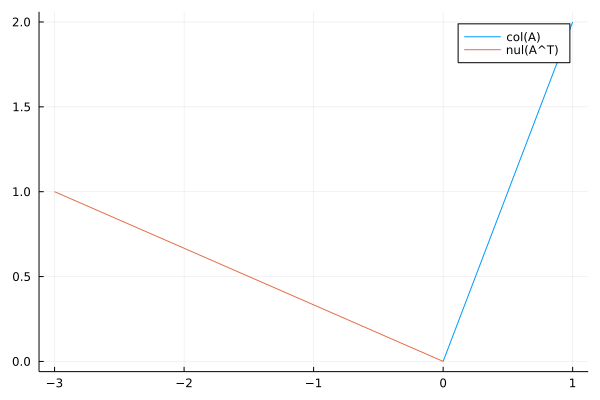

In [380]:
x = [[0, 1], [0, -3]]
y = [[0, 2], [0, 1]]
plot(x, y, label=["col(A)" "nul(A^T)"])

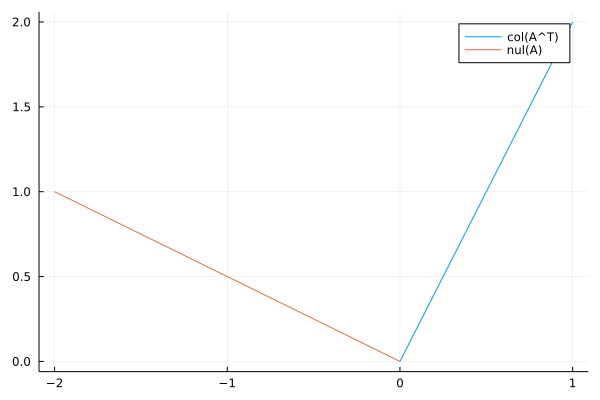

In [381]:
x = [[0, 1], [0, -2]]
y = [[0, 2], [0, 1]]
plot(x, y, label=["col(A^T)" "nul(A)"])

We can see that the spaces are orthogonal to each other

## Left inverse, right inverse, full inverse

If $A$ is an $m \times n$ matrix, then the following inverses are defined:
- Right inverse: full row rank (i.e., $rank = m$)
- Left inverse: full column rank (i.e., $rank = n$)
- Full inverse: $m = n = rank$

A right inverse is only possible if $m \leq n$

A left inverse is only possible if $m \geq n$

Julia does not have a built-in function to compute the left and right inverse (only the full inverse is supported). We can, however, easily define those functions.

A right inverse exists if $AA^T$ is invertible. A left inverse exists if $A^TA$ is invertible.

In [382]:
function inv_right(A)
    A'*inv(A*A')
end

inv_right (generic function with 1 method)

In [383]:
function inv_left(A)
    inv(A'*A)*A'
end

inv_left (generic function with 1 method)

In [384]:
A = [
    4 0 0;
    0 5 0;
]
inv_right(A)

3×2 Array{Float64,2}:
 0.25  0.0
 0.0   0.2
 0.0   0.0

In [385]:
A * inv_right(A)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [386]:
A = [
    4 0;
    0 5;
    0 0;
]
inv_left(A)

2×3 Array{Float64,2}:
 0.25  0.0  0.0
 0.0   0.2  0.0

In [387]:
inv_left(A) * A

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [388]:
A = [
    4 0;
    0 5;
]
inv(A)

2×2 Array{Float64,2}:
 0.25  0.0
 0.0   0.2

The existence of a right inverse implies that there exists **at least one solution** to $Ax = b$ for all $b \in \mathbb{R}^n$

The existence of a left inverse implies that there exists **at most one solution** to $Ax = b$ for all $b \in \mathbb{R}^n$

# Tensor Product

Quantum circuits are composed by computing the tensor products between different gates. For example, $H\otimes X$ can be viewed as a circuit that applies a Hadamard gate to the first qubit and an X gate to the second qubit. I never really understood the tensor product before taking this class. I knew how to mechanically compute the Kronecker product, but didn't attempt to understand it beyond it.

Here is my attempt at exploring the concept in Julia!

In [389]:
A = [
    0 1;
    1 0;
]
B = [
    1 0;
    0 -1;
]
kron(A, B)

4×4 Array{Int64,2}:
 0   0  1   0
 0   0  0  -1
 1   0  0   0
 0  -1  0   0

The `kron` function computes the Kronecker product. The Kronecker product $A \otimes B$ is defined conveniently by the block matrix $\begin{bmatrix}
  a_{11}B & \ldots & a_{1n}B \\
  \vdots & \ddots & \\
  a_{m1}B & & a_{mm}B
\end{bmatrix}$.

Observation: The dimension of the matrices *multiply* together (and not add like in the case of the Cartesian product).

In the above example, $dim(A) = 2$, $dim(B) = 2$. 

$dim(A \otimes B) = 2 * 2 = 4$

The tensor product offers a mathematical explanation for why quantum computing offers an exponentially larger computational space for the same number of computing units.

# Chapter 2 HW

## Section 2.2

### 33

In [390]:
A = [
    1 3 3;
    2 6 9;
    -1 -3 3;
]
b = [
    1;
    5;
    5;
]

x = A \ b

LoadError: [91mSingularException(2)[39m

The columns of $A$ are not linearly independent. Therefore we run into `SingularException`.

In [391]:
F = lu(A, check=false)
F.P*F.L*F.U == A

true

In [392]:
F.L

3×3 Array{Float64,2}:
  1.0  0.0  0.0
  0.5  1.0  0.0
 -0.5  0.0  1.0

In [393]:
F.U

3×3 Array{Float64,2}:
 2.0  6.0   9.0
 0.0  0.0  -1.5
 0.0  0.0   7.5

Using this, we can easily read off the solutions.

$x_1 = -3x_2 -4.5x_3$

$x_2 = x_2$

$x_3 = 0$

$Nul(A) = \{ \begin{pmatrix}-3\\1\\0\end{pmatrix} \}$

In [394]:
inv(F.P*F.L)*b

3-element Array{Float64,1}:
  5.0
 -1.5
  7.5

Particular solution:

$x_p = \begin{pmatrix}-2\\0\\1\end{pmatrix}$

Therefore, the set of all solutions is given by:

$x = x_n + x_p$, where $x_n \in Nul(A)$

### 36

In [395]:
# (a)

A = [
    1 2 1;
    2 6 3;
    0 2 5
]

rref(A)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [396]:
lu(A)

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
 1.0   0.0  0.0
 0.0   1.0  0.0
 0.5  -0.5  1.0
U factor:
3×3 Array{Float64,2}:
 2.0  6.0  3.0
 0.0  2.0  5.0
 0.0  0.0  2.0

Therefore, $Col(A) = \mathbb{R^3}$ and $Nul(A) = \{ 0 \}$

In [397]:
# (b)

A = [
    1 1 1;
    1 2 4;
    2 4 8;
]

rref(A)

3×3 Array{Float64,2}:
 1.0  0.0  -2.0
 0.0  1.0   3.0
 0.0  0.0   0.0

Therefore, $Col(A) = span\{\begin{pmatrix}1\\1\\2\end{pmatrix}, \begin{pmatrix}1\\2\\4\end{pmatrix}\}$ and $Nul(A) = span\{\begin{pmatrix}2\\-3\\1\end{pmatrix}\}$

# Linear Programming

Linear programming (LP) is an optimization technique used to find the best outcome given a list of linear constraints. Many real-world problems (scheduling, supply-chain logistics, network flow) can be solved using LP.

Here's an example I found on the internet (https://www.upgrad.com/blog/linear-programming-problems-solutions/):

Suppose you are a manufacturer of toys and you only produce two toys: $A$ and $B$. Roughly speaking, your toys require two resources $X$ and $Y$ to manufacture. Here are the requirements of your toys:

- One unit of toy $A$ requires you one unit of resource $X$ and three units of resource $Y$
- One unit of toy $B$ requires one unit of resource $X$ and two units of resource $Y$
- You have five units of resource $X$ and 12 units of resource $Y$. 

Your profit margins on the sale of these toys are:

- $\$6$ on each sold unit of toy $A$
- $\$5$ on each sold unit of toy $B$

How many units of each toy would you produce to get the maximum profit?

We can represent the objective as:

$$\text{maximize } 6a + 5b$$

The constraints are:

\begin{align}
    a + b & \leq 5 \\
    3a + 2b & \leq 12 \\
    a & \geq 0 \\
    b & \geq 0
\end{align}

This is an LP problem! Note how each constraint is linear.

In general, we can convert any LP problem into the following canonical form:

$$\text{maximize } c^Tx$$

\begin{align}
    Ax \leq b \\
    x \geq 0
\end{align}

where $A$ is an $m \times n$ matrix, $x \in \mathbb{R}^n$. There are $m$ constraints (excluding the non-negativity constraint)

Julia has the JuMP package which lets us model LP problems and solve them. It also has support for other kinds of mathematical optimizations. Let's try to solve the previous problem using it.

In [398]:
using JuMP
using GLPK

In [399]:
model = Model(GLPK.Optimizer)
@variable(model, a >= 0)
@variable(model, b >= 0)
@objective(model, Max, 6a + 5b)
@constraint(model, c1, a + b <= 5)
@constraint(model, c2, 3a + 2b <= 12)

print(model)
optimize!(model)

@show value(a)
@show value(b)
@show objective_value(model)

value(a) = 2.0000000000000004
value(b) = 2.9999999999999996
objective_value(model) = 27.0


27.0

Julia lets programmers define macros which can help in removing a lot of boilterplate code. Note how JuMP provides us with macros like `@variable`, `@objective` and `@constraint`. The description of the LP problem very closely resembles how we would write it out in $\LaTeX$

The optimal values are $a = 2$ and $b = 3$ (we can safely round up the values since we know that $a$ and $b$ have to be integers.

Let's solve another problem!

(From DPV Chapter 7, 7.3)

A cargo plane can carry a maximum weight of 100 tons and a maximum volume of 60 cubic meters. There are three materials to be transported, and the cargo company may choose to carry any amount of each, up to the maximum available limits given below.

- Material 1 has density 2 tons/cubic meter, maximum available amount 40 cubic meters, and revenue \$1,000 per cubic meter.
- Material 2 has density 1 ton/cubic meter, maximum available amount 30 cubic meters, and revenue \$1,200 per cubic meter.
- Material 3 has density 3 tons/cubic meter, maximum available amount 20 cubic meters, and revenue \$12,000 per cubic meter.

Write a linear program that optimizes revenue within the constraints.

In [400]:
model = Model(GLPK.Optimizer)
# Let v1, v2, v3 be the volumes of Material 1, Material 2, and Material 3
@variable(model, v1 >= 0)
@variable(model, v2 >= 0)
@variable(model, v3 >= 0)
@objective(model, Max, 1000v1 + 1200v2 + 12000v3)
# Density = Mass / Volume
@constraint(model, c1, 2v1 + v2 + 3v3 <= 100)
@constraint(model, c2, v1 + v2 + v3 <= 60)
@constraint(model, c3, v1 <= 40)
@constraint(model, c4, v2 <= 30)
@constraint(model, c5, v3 <= 20)
print(model)
optimize!(model)
@show value(v1)
@show value(v2)
@show value(v3)
@show objective_value(model)

value(v1) = 5.0
value(v2) = 30.0
value(v3) = 20.0
objective_value(model) = 281000.0


281000.0

Now let's take a look at a max-flow problem.

Let $G = (V, E, s, t, c)$ be a network where $s$ is the source vertex, $t$ is the sink vertex, and $c$ is the edge-capacities.

Every flow $f$ of the network must obey the following two laws:

- Conservation of Flow: $\sum_{(u,v) \in E}f_{uv} = \sum_{(v,t) \in E}f_{vt}$, for $v \in V \setminus \{s, t \}$
- Capacity constraint: $f_e \leq c_e \forall e \in E$

**Objective**: Given $G$, we wish to find the maximum flow in the network.

We can see that each constraint is linear. This means that we can formulate this problem as an LP.

Here is an example max-flow problem:

![max-flow-problem](assets/max-flow-problem.jpeg)

In [401]:
# Encode the graph

V = Set(["S", "A", "B", "C", "D", "E", "F", "G", "T"])
E = Set([
        ("S", "A"),
        ("S", "B"),
        ("S", "C"),
        ("A", "B"),
        ("A", "E"),
        ("A", "D"),
        ("B", "E"),
        ("C", "B"),
        ("C", "F"),
        ("D", "E"),
        ("D", "G"),
        ("E", "F"),
        ("E", "G"),
        ("F", "T"),
        ("G", "T")
        ])
s = "S"
t = "T"
V_s = setdiff(V, Set([s,t]))
E_s = setdiff(E, Set([s,t]))
c = Dict(
    ("S", "A") => 6,
    ("S", "B") => 1,
    ("S", "C") => 10,
    ("A", "B") => 2,
    ("A", "E") => 1,
    ("A", "D") => 4,
    ("B", "E") => 20,
    ("C", "B") => 2,
    ("C", "F") => 5,
    ("D", "E") => 2,
    ("D", "G") => 5,
    ("E", "F") => 6,
    ("E", "G") => 10,
    ("F", "T") => 4,
    ("G", "T") => 12
)

Dict{Tuple{String,String},Int64} with 15 entries:
  ("B", "E") => 20
  ("D", "G") => 5
  ("S", "A") => 6
  ("S", "C") => 10
  ("C", "F") => 5
  ("F", "T") => 4
  ("A", "B") => 2
  ("S", "B") => 1
  ("G", "T") => 12
  ("A", "E") => 1
  ("D", "E") => 2
  ("C", "B") => 2
  ("E", "F") => 6
  ("A", "D") => 4
  ("E", "G") => 10

In [402]:
model = Model(GLPK.Optimizer)
@variable(model, flow[e in E] >= 0)
@objective(model, Max, sum(flow[(s,u)] for u in V if (s,u) in E))
@constraint(model, cap[e in E], flow[e] <= c[e])
@constraint(
    model, 
    cons[v in V_s], 
    sum(flow[(u,v)] for u in V if (u,v) in E) == sum(flow[(v,t)] for t in V if (v,t) in E)
)
optimize!(model)
outgoing_flow = sum(value(flow[(s,u)]) for u in V if (s,u) in E)

13.0

The max-flow is 13!

Note that there are several other ways to find the $s$-$t$ max-flow. One popular algorithm is the Edmunds-Karps algorithm which has a running time of $O(|V||E|^2)$.

We haven't covered the notion of a dual LP in our presentation. An important consequence of the dual in the context of max-flows is that the max-flow is equal to the min-cut.

## Simplex Algorithm

Simplex is a very popular algorithm for solving LP problems.

Earlier we saw how any LP can be put into a canonical form. The constratin $Ax \leq b$ represents a system of linear constraints. Each constraint is a region that lives in $\mathbb{R}^n$. These regions can intersect with each other.

Claim: The optimal value must be one of the points of intersection.

Simplex uses this fact to solve the LP. The algorithm starts at one of the points of intersection (which can be $0$ in the first iteration). It then tries to find the neighboring points of intersection such that those points are more optimal. If it can't find any such points, then the algorithm halts.

# Least-Squares

We've learned about least-squares in class. Let's try to solve some least-squares problem in Julia and plot the results.

## Part 1: New York Stock Exchange data

I downloaded a [Medical Cost Personal Dataset](https://www.kaggle.com/mirichoi0218/insurance) from Kaggle which has data on insurance costs and BMI.

I'm going to try to fit a straight line $y = mx + b$ onto "BMI vs Insurance Cost"

In [404]:
using CSV
using DataFrames

In [405]:
df = DataFrame(CSV.File("assets/medical_insurance/insurance.csv"));

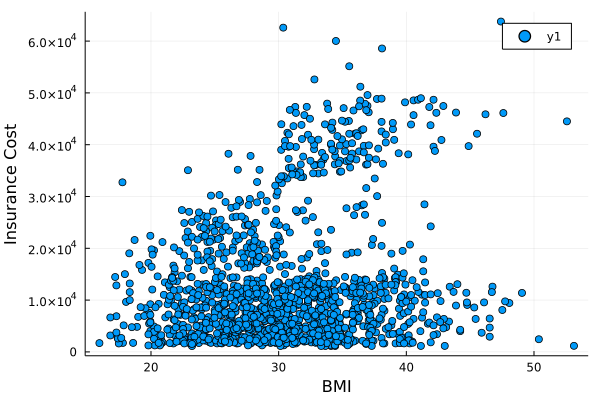

In [406]:
p = plot(df."bmi", df."charges", seriestype = :scatter, xlabel="BMI", ylabel="Insurance Cost")

In [407]:
A = hcat(ones(Float64, length(df."bmi")), df."bmi")
b = df."charges"

x = (inv(A'A))A'b

2-element Array{Float64,1}:
 1192.9372089610724
  393.873030797398

Therefore, the best-fit line is $y = 393.87x + 1192.93$

In [408]:
b,m = x
y = a -> m*a + b

#31 (generic function with 1 method)

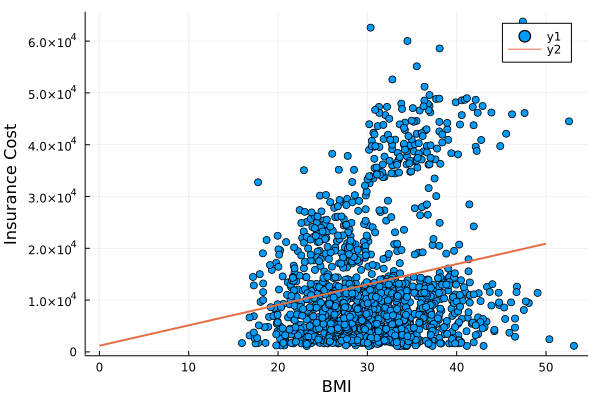

In [409]:
plot!(p, [0, 50], [y(0), y(50)], linewidth=2)

## Part 2: Fitting an ellispe

First, let's generate some random datapoints for the ellipse.

The parametric representation of an ellipse:

- $x = a\cos(t)$
- $y = b\sin(t)$

Also, 
$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$

In [410]:
using Random

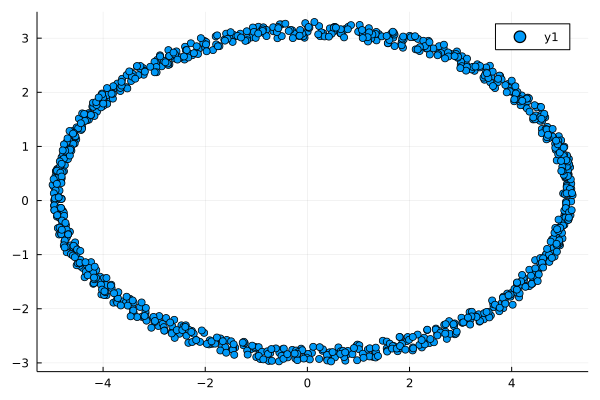

In [411]:
n = 1000

a = 5
da = 0.2

b = 3
db = 0.3

t = 1:n
x = a * cos.(t) + da * rand(Float64, n)
y = b * sin.(t) + db * rand(Float64, n)

p = plot(x, y, seriestype=:scatter)

In [412]:
A = hcat(x.^2, y.^2)
b = hcat(ones(n))
x = inv(A'A)A'b

2×1 Array{Float64,2}:
 0.03987326934557693
 0.10851093488872132

In [413]:
a_inv, b_inv = x
a = √(1/a_inv)
b = √(1/b_inv)

3.035730733357614

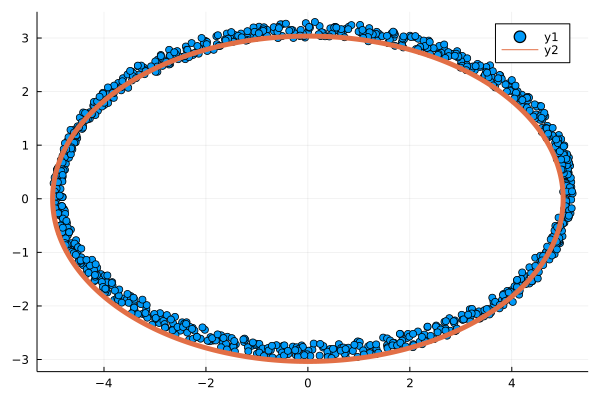

In [414]:
tvec = range(0, 4π, length = n)
plot!(p, a*cos.(tvec), b*sin.(tvec), linewidth=5)

# Discrete Fourier Transform

In [415]:
using WAV
using FFTW

In [416]:
fft([0; 1; 2; 1])

4-element Array{Complex{Float64},1}:
  4.0 + 0.0im
 -2.0 + 0.0im
  0.0 + 0.0im
 -2.0 + 0.0im

In [417]:
y_all, fy = wavread("assets/chord_progression.wav")

([0.0 0.0; 0.0 0.0; … ; -0.005859553819391461 -0.00598162785729545; -0.0030823694570757164 -0.0031128879665517136], 44100.0f0, 0x0010, WAVChunk[WAVChunk(:JUNK, UInt8[0x08, 0xfc, 0x2e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00  …  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00]), WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x44, 0xac, 0x00, 0x00, 0x10, 0xb1, 0x02, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(Symbol("cue "), UInt8[0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00  …  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00]), WAVChunk(:LIST, UInt8[0x61, 0x64, 0x74, 0x6c, 0x6c, 0x61, 0x62, 0x6c, 0x12, 0x00  …  0x53, 0x65, 0x63, 0x74, 0x69, 0x6f, 0x6e, 0x20, 0x41, 0x00])])

In [418]:
y = [first(row) for row in eachrow(y_all)];

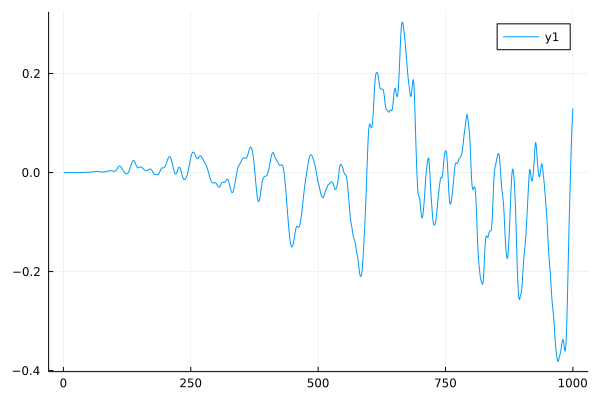

In [419]:
plot(y[1:1000])

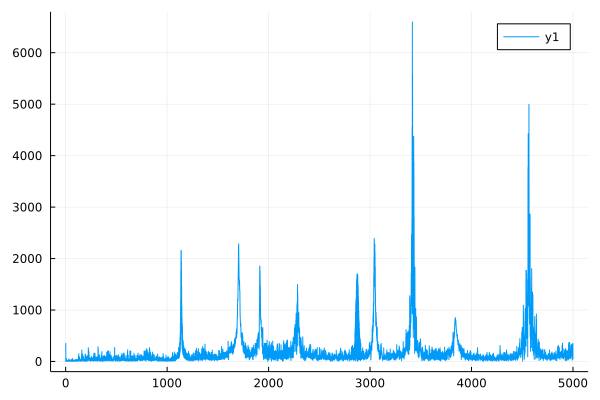

In [420]:
plot(abs.(fft(y)[1:5000]))

Now let's look at sounds of specific frequencies and try to combine the plots together.

In [421]:
files = ["assets/250hz.wav", "assets/440hz.wav", "assets/1khz.wav"]
ys = first.(wavread.(files));

## 250Hz

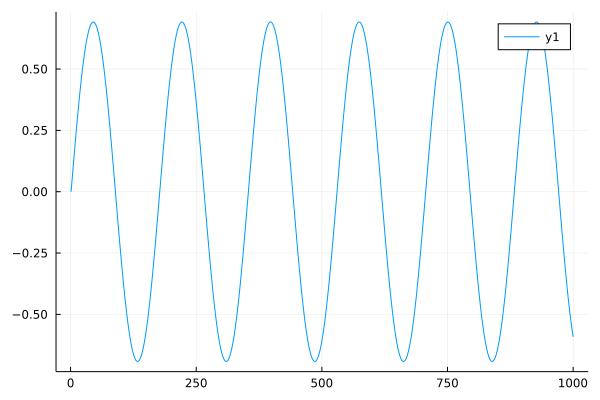

In [422]:
plot(ys[1][1:1000])

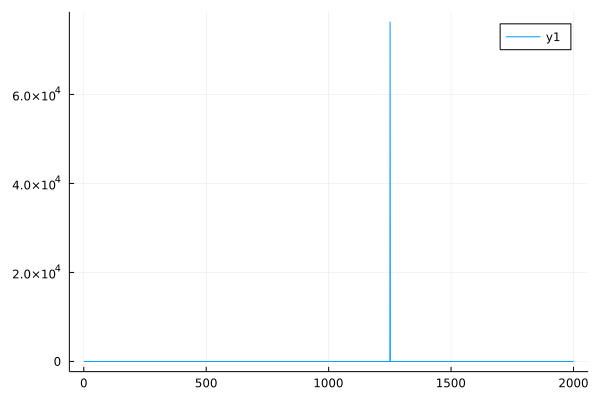

In [423]:
plot(abs.(fft(ys[1]))[1:2000])

## 440Hz

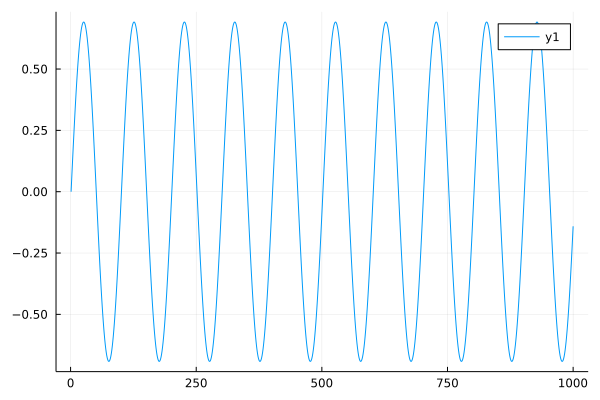

In [424]:
plot(ys[2][1:1000])

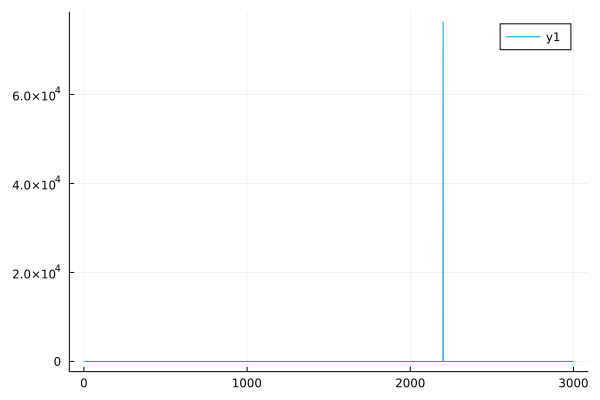

In [425]:
plot(abs.(fft(ys[2]))[1:3000])

## 1kHz

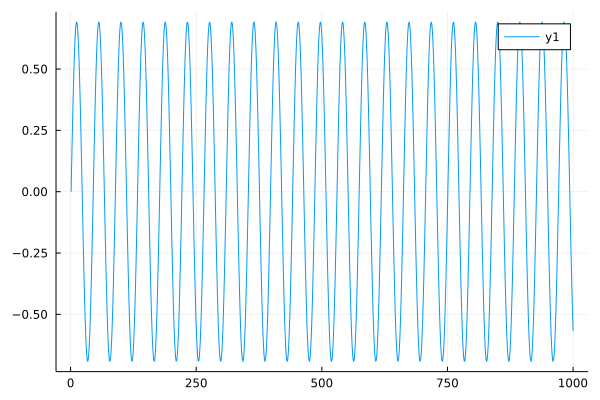

In [426]:
plot(ys[3][1:1000])

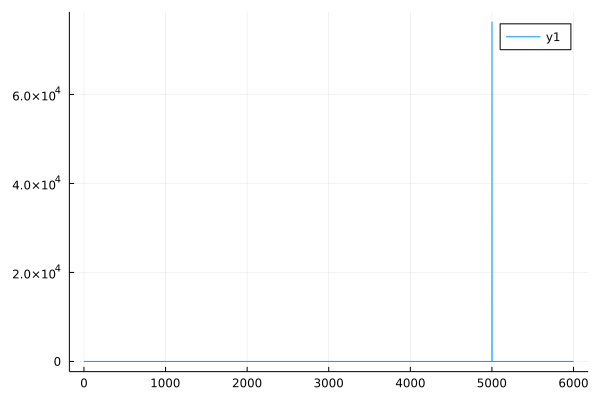

In [427]:
plot(abs.(fft(ys[3]))[1:6000])

## Combination

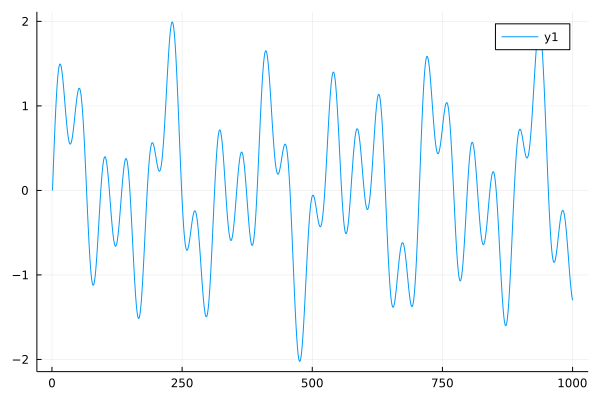

In [428]:
plot(sum(ys)[1:1000])

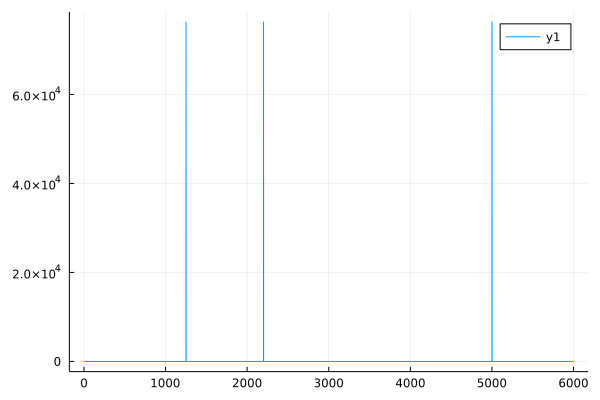

In [429]:
plot(abs.(fft(sum(ys)))[1:6000])

Note how the FFT graph matches the combination of the individual graph. We can very clearly see the peaks. On the other hand, the waveform graph appears a lot more complicated!

## Chapter 3 HW

## Section 3.3

### 32

In [430]:
A = [
    1 0;
    1 1;
    1 3;
    1 4;
]
b = [
    0;
    8;
    8;
    20
]

x = (A'*A)^-1 * A' * b

2-element Array{Float64,1}:
 0.9999999999999991
 4.000000000000001

In [431]:
p = A*x

4-element Array{Float64,1}:
  0.9999999999999991
  5.0
 13.000000000000004
 17.000000000000004

In [432]:
error = b - A*x

4-element Array{Float64,1}:
 -0.9999999999999991
  3.0
 -5.0000000000000036
  2.9999999999999964

In [433]:
E_squared = sum(error.^2)

44.000000000000014

### 33

\begin{align}
C &= 0 \\
C + D &= 8 \\
C + 3D &= 8 \\
C + 4D &= 20
\end{align}

In [434]:
p = [
    1;
    5;
    13;
    17
]

x = A\p

2-element Array{Float64,1}:
 1.0000000000000004
 4.0

Note that there are rounding erros (in both q32 and q33). The exact answer is $(1,4)$.

### 34

In [435]:
e = [
    -1;
    3;
    -5;
    3
]

A' * e

2-element Array{Int64,1}:
 0
 0

In [436]:
norm(e)

6.6332495807108

$\therefore \Vert e \Vert = 6.6332495807108$ 

### 35

\begin{align}
    C &= 0 \\
    C + D + E &= 8 \\
    C + 3D + 9E &= 8 \\
    C + 4D + 16E &= 20
\end{align}

In [437]:
A = [
    1 0 0;
    1 1 1;
    1 3 9;
    1 4 16;
]
b = [
    0;
    8;
    8;
    20
]

x = (A'*A)^-1 * A' * b

3-element Array{Float64,1}:
 2.000000000000006
 1.333333333333325
 0.6666666666666712

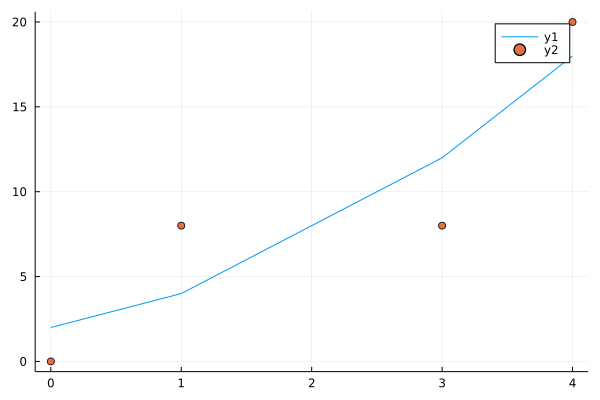

In [438]:
xs = [0; 1; 3; 4]
p = plot(xs, A * x)
plot!(p, xs, b, seriestype = :scatter)

We can see that Fig 3.9b is no longer a straight line but is starting to look like a parabola.

### 36

\begin{align}
    C &= 0 \\
    C + D + E + F &= 8 \\
    C + 3D + 9E + 27F &= 8 \\
    C + 4D + 16E + 64F &= 20
\end{align}

In [439]:
A = [
    1 0 0 0;
    1 1 1 1;
    1 3 9 27;
    1 4 16 64;
]

x = A^-1 * b

4-element Array{Float64,1}:
  0.0
 15.666666666666666
 -9.333333333333334
  1.6666666666666667

In [440]:
rref(A)

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

$A$ is invertible. There exists a unique solution for the above system.

In [441]:
p = A*x

4-element Array{Float64,1}:
  0.0
  7.999999999999999
  8.0
 19.999999999999986

In [442]:
round.(p)

4-element Array{Float64,1}:
  0.0
  8.0
  8.0
 20.0

In [443]:
e = b - p

4-element Array{Float64,1}:
 0.0
 8.881784197001252e-16
 0.0
 1.4210854715202004e-14

In [444]:
round.(e)

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

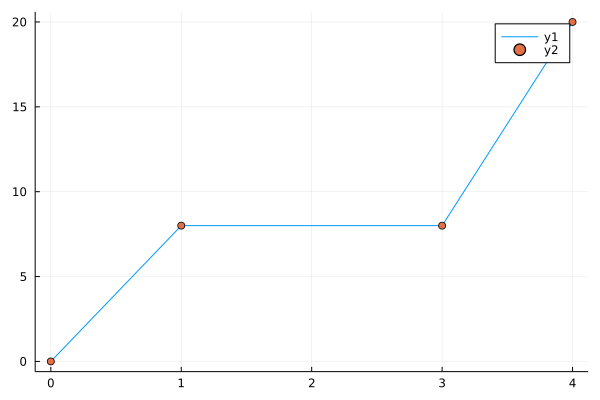

In [445]:
xs = [0;1;3;4]
pl = plot(xs, A*x)
plot!(pl, xs, b, seriestype=:scatter)

Here's a smooth version of the curve

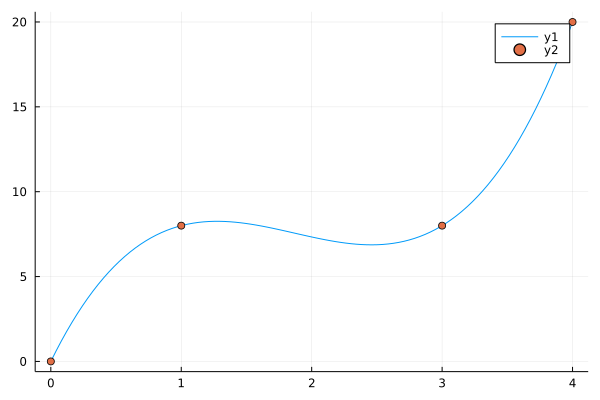

In [446]:
function soln_poly(t)
    sum(x' * [1; t^1; t^2; t^3])
end

xs = range(0, 4, length=100)
pl = plot(xs, soln_poly.(xs))
plot!(pl, [0;1;3;4], b, seriestype=:scatter)

### 37

Best line is obtained by setting $C = 1$ and $D = 4$

In [447]:
1 + 4 * 2 == 9

true

In [448]:
A = [
    1 0;
    1 1;
    1 3;
    1 4;
]
b = [
    0;
    8;
    8;
    20
]

display(A'A)
display(A'b)

2×2 Array{Int64,2}:
 4   8
 8  26

2-element Array{Int64,1}:
  36
 112

The first equation is given by:
\begin{align}
(\sum_i^m 1) C + (\sum_i^m t_i) D &= (\sum_i^m b_i \cdot 1) \\
mC + (\sum_i^m t_i) D &= (\sum_i^m b_i) \\
C + D\hat{t} &= \hat{b} \\
\end{align}

# Chapter 5 HW

## Section 5.2

### 29

It approaches zero as $k \rightarrow \infty$ if and only if $\lambda$ has absolute value less than 1.

In [449]:
A = [
    0.6 0.4;
    0.4 0.6
]

eigvals(A)

2-element Array{Float64,1}:
 0.19999999999999996
 1.0

In [450]:
B = [
    0.6 0.9;
    0.1 0.6
]

eigvals(B)

2-element Array{Float64,1}:
 0.29999999999999993
 0.8999999999999999

Only $B^k \rightarrow 0$

### 30

In [451]:
A = [
    0.6 0.4;
    0.4 0.6
]

vals, S = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.19999999999999996
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

$\Lambda = \begin{bmatrix}0.19 & 0\\0 & 1\end{bmatrix}$

$S = \begin{bmatrix}-0.707107 & 0.707107\\0.707107 & 0.707107\end{bmatrix}$

$\Lambda^k$ as $k \rightarrow \infty = \begin{bmatrix}0 & 0\\0 & 1\end{bmatrix}$

$\therefore S\Lambda^kS^{-1}$ as $k \rightarrow \infty = \begin{bmatrix}0.5 & 0.5 \\ 0.5 & 0.5\end{bmatrix}$

In [452]:
S * [0 0; 0 1] * S^-1

2×2 Array{Float64,2}:
 0.5  0.5
 0.5  0.5

Each column of this matrix is an eigenvector for the eigenvalue $\lambda = 1$

In [453]:
A * [0.5;0.5] == [0.5;0.5]

true

### 31

In [454]:
B = [
    0.6 0.9;
    0.1 0.6
]

vals, S = eigen(B)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.29999999999999993
 0.8999999999999999
vectors:
2×2 Array{Float64,2}:
 -0.948683  0.948683
  0.316228  0.316228

$\Lambda = \begin{bmatrix}0.299 & 0\\0 & 0.899\end{bmatrix}$

$S = \begin{bmatrix}-0.948683 & 0.948683\\0.316228 & 0.316228\end{bmatrix}$

In [455]:
u0_a = [3;1]
u0_b = [3;-1]
u0_c = [6;0]

B10 = B^10

display(B10*u0_a)
display(B10*u0_b)
display(B10*u0_c)

2-element Array{Float64,1}:
 1.0460353203000001
 0.3486784401

2-element Array{Float64,1}:
  1.771469999989339e-5
 -5.904900000019975e-6

2-element Array{Float64,1}:
 1.046053035
 0.34867253519999997

Note how these values are approaching zero.

In [456]:
B^10

2×2 Array{Float64,2}:
 0.174342   0.523009
 0.0581121  0.174342

In [457]:
B^100

2×2 Array{Float64,2}:
 1.32807e-5  3.98421e-5
 4.4269e-6   1.32807e-5

In [458]:
B^1000

2×2 Array{Float64,2}:
 8.73936e-47  2.62181e-46
 2.91312e-47  8.73936e-47

In [459]:
round.(B^1000)

2×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0

### 45

In [460]:
A = [
    0.6 0.2;
    0.4 0.8
]

vals, S = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.39999999999999997
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  -0.447214
  0.707107  -0.894427

Let's find $A^k$ as $k \rightarrow \infty$ as well

In [461]:
S * [0 0; 0 1] * S^-1

2×2 Array{Float64,2}:
 0.333333  0.333333
 0.666667  0.666667

This is $A^{\infty}$. Therefore, $A^{\infty}$ is the steady-state matrix of the Markov chain.

In [462]:
A_infty = [
    1//3 1//3;
    2//3 2//3
]

vals, S = eigen(A_infty)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.0
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  -0.447214
  0.707107  -0.894427

We can read the eigenvalues and eigenvectors off the results

In [463]:
A^100

2×2 Array{Float64,2}:
 0.333333  0.333333
 0.666667  0.666667

$A^{\infty}$ is the steady-state matrix for the Markov Chain.

Every Markov Chain has a transition matrix $P$ and the distribution of probabilities at time $t$ given an initial state $\mu_0$ is given by the following equation:

$\mu_t = \mu_0P^t$

We can compare $A^{100}$ and $A^{\infty}$ by looking at their eigen decompositions.

In [464]:
A100 = A^100

vals, S = eigen(A100)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.0
 1.0000000000000089
vectors:
2×2 Array{Float64,2}:
 -0.707107  -0.447214
  0.707107  -0.894427

The eigenvalues and eigenvectors are nearly identical (ignoring rounding errors). This result makes sense because we are expecting $A$ to ultimately converge to $A^{\infty}$

## Section 5.3

### 3

In [465]:
A = [1 1; 1 0]

display(A^2)
display(A^3)
display(A^4)

2×2 Array{Int64,2}:
 2  1
 1  1

2×2 Array{Int64,2}:
 3  2
 2  1

2×2 Array{Int64,2}:
 5  3
 3  2

In [466]:
A^20

2×2 Array{Int64,2}:
 10946  6765
  6765  4181

In [467]:
A^20 * [1;0]

2-element Array{Int64,1}:
 10946
  6765

$\therefore F_{20} = 6765$

Let's verify this by writing a classical fibonacci sequence function.

In [468]:
function fib(n)
    if n == 0
        return 0
    elseif n == 1
        return 1
    else
        return fib(n-1) + fib(n-2)
    end
end

fib (generic function with 1 method)

In [469]:
fib(20)

6765

The structure of $A^k$ is interesting.

$A^k = \begin{bmatrix}F_{k+1} & F_k \\ F_k & F_{k-1}\end{bmatrix}$

#### 7

In [470]:
A = [1 1; 1 0]

res = A^10 * [1;2]

2-element Array{Int64,1}:
 199
 123

In [471]:
exact = res[2]

123

In [472]:
l1 = 0.5 * (1 + √5)

approx = l1^10

122.99186938124426

In [473]:
abs(exact-approx)

0.008130618755743058

In [474]:
l2 = 0.5 * (1 - √5)

l1^10 + l2^10

123.00000000000004

### 16

In [475]:
A = [
    0 -1;
    1 0;
]

2×2 Array{Int64,2}:
 0  -1
 1   0

In [476]:
# (F)
eigvals(I+A)

2-element Array{Complex{Float64},1}:
 1.0 - 1.0im
 1.0 + 1.0im

In [477]:
# (B)
eigvals((I-A)^-1)

2-element Array{Complex{Float64},1}:
 0.5 - 0.5000000000000001im
 0.5 + 0.5000000000000001im

In [478]:
# (C)
eigvals((I-0.5*A)^-1 * (I+0.5*A)^-1)

2-element Array{Float64,1}:
 0.8000000000000002
 0.8000000000000002

In [479]:
# TODO figure out which solution stays on the circle

### 29

In [480]:
A = [
    3 2;
    1 4
]

B = [
    3 2;
    -5 -3;
]

C = [
    5 7;
    -3 -4;
]

D = [
    5 6.9;
    -3 -4
]

2×2 Array{Float64,2}:
  5.0   6.9
 -3.0  -4.0

In [481]:
opnorm(A^1024)

1.2066571869539525e19

I'm not getting something $> 10^{700}$. The opnorm function computes the matrix norm. I wonder if this is a typesetting error in the textbook

In [482]:
B^1024

2×2 Array{Int64,2}:
 1  0
 0  1

In [483]:
C^1024

2×2 Array{Int64,2}:
 -5  -7
  3   4

In [484]:
opnorm(D^1024)

4.656336537257555e-79

In [485]:
round.(eigvals(B))

2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

The eigenvalues are $e^{\frac{3\pi i}{2}} = -i$ and $e^{\frac{\pi i}{2}} = i$. This means that $\lambda^4 = 1$

In [486]:
vals, S = eigen(B)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 2.42861286636753e-16 - 1.0000000000000004im
 2.42861286636753e-16 + 1.0000000000000004im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.507093+0.169031im  -0.507093-0.169031im
  0.845154-0.0im        0.845154+0.0im

In [487]:
B^4

2×2 Array{Int64,2}:
 1  0
 0  1

In [488]:
(S * [-im 0; 0 im]^4 * S^-1) == I

true

In [489]:
eigvals(C)

2-element Array{Complex{Float64},1}:
 0.5000000000000002 - 0.8660254037844388im
 0.5000000000000002 + 0.8660254037844388im

The eigenvalues of are $e^{\frac{5\pi i}{3}} = 0.5 - 0.866 i$ and $e^{\frac{\pi i}{3}} = 0.5 + 0.866 i$. This means that $\lambda^3 = -1$

In [490]:
round.((0.5000000000000002 - 0.8660254037844388im)^3)

-1.0 - 0.0im

In [491]:
round.((0.5000000000000002 + 0.8660254037844388im)^3)

-1.0 + 0.0im

In [492]:
C^3

2×2 Array{Int64,2}:
 -1   0
  0  -1

In [493]:
vals, S = eigen(C)

lambda = [
    0.5000000000000002 - 0.8660254037844388im 0;
    0 0.5000000000000002 + 0.8660254037844388im;
]
round.((S * lambda^3 * S^-1)) == -I

true

## Section 5.4

### 38

First let's try out the matrices provided in the question

In [494]:
A = [
    1 1;
    0 0;
]

B = [
    0 -1;
    0 0
]

2×2 Array{Int64,2}:
 0  -1
 0   0

In [495]:
eab = exp(A) * exp(B)

2×2 Array{Float64,2}:
 2.71828  -1.0
 0.0       1.0

In [496]:
eba = exp(B) * exp(A)

2×2 Array{Float64,2}:
 2.71828  0.718282
 0.0      1.0

In [497]:
eapb = exp(A + B)

2×2 Array{Float64,2}:
 2.71828  0.0
 0.0      1.0

In [498]:
display(eab == eba)
display(eab == eapb)
display(eba == eapb)

false

false

false

### 36

In [499]:
A = [
    1 1;
    0 0;
]

vals, S = eigen(A)

lambda = [
    vals[1] 0;
    0 vals[2]
]

A == S * lambda * S^-1

true

During our previous discussion on the matrix exponential, we know that computing it for a diagnoal matrix is easy: exponentiate each term on the diagonal.

For t = 1,

In [500]:
exp(lambda)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  2.71828

In [501]:
exp(A) ≈ S * exp(lambda) * S^-1

true

In [502]:
S * exp(lambda) * S^-1

2×2 Array{Float64,2}:
 2.71828  1.71828
 0.0      1.0

### 37

\begin{align}
e^{At} &= I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \ldots \\
&= I + A + \frac{A}{2!} + \frac{A^2}{3!} + \ldots \\
&= I + A + \frac{A}{2!} + \frac{A}{3!} + \ldots \\
&= I + A (1 + \frac{1}{2!} + \frac{1}{3!} \ldots) \\
&= I + (e^t - 1)A
\end{align}

For $\begin{bmatrix}1 & 1\\0 & 0\end{bmatrix}$,

\begin{align}
e^{At} &= I + (e^t - 1) A \\
&= I + \begin{bmatrix}e^t-1 & e^t-1\\0 & 0\end{bmatrix} \\
&= \begin{bmatrix}e^t & e^t-1\\0 & 1\end{bmatrix} \\
\end{align}

In [503]:
# for t = 1
[
    exp(1) (exp(1) - 1);
    0 1
]

2×2 Array{Float64,2}:
 2.71828  1.71828
 0.0      1.0

## Sidenote: When does $e^xe^y = e^ye^x = e^{x+y}$?

I looked through the Wikipedia entry for Matrix exponential. If $A$ and $B$ commute, then the formula must hold!

$e^Ae^B = e^Be^A = e^{A + B}$

Two matrices are said to commute if $AB = BA$

In [504]:
# example

A = [
    2 0;
    1 -1;
]

B = [
    3 0;
    1 0;
]

A*B == B*A

true

In [505]:
exp(A)*exp(B) ≈ exp(B)*exp(A) ≈ exp(A+B)

true

# Minima, Maxima, and Saddle Points

How can we determine if a function $f$ has a local minima, local maxima, or saddle point?

For the one-dimensional case, we first find a stationary point $x$ (i.e., a point where $f'(x) = 0$) and then check the sign of $f''(x)$.

The question is how do we generalize this test to $n$ dimensions?

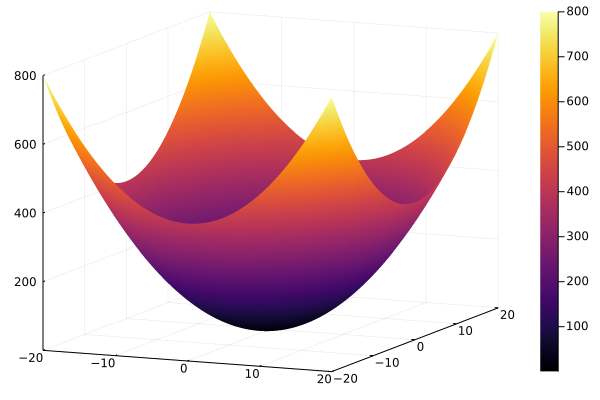

In [506]:
# f(x,y) = x^2 + y^2

# Positive semi-definite matrix
# Surface shaped like a bowl

n = 100
ts = range(-20, stop = 20, length = n)
x = ts
y = ts
f(x,y) = x^2 + y^2
surface(x, y, f)

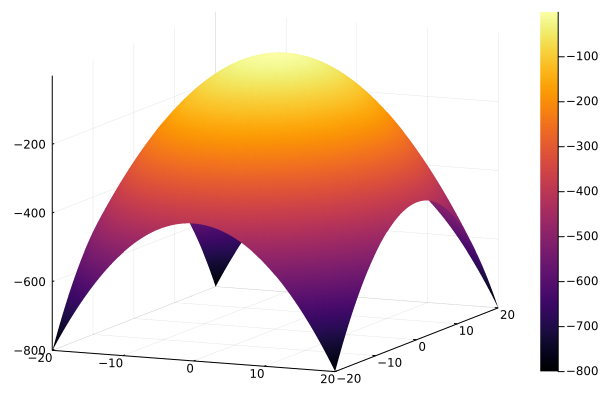

In [507]:
# f(x,y) = -(x^2 + y^2)

# Negative semi-definite matrix
# Surface shaped like an inverted bowl

n = 100
ts = range(-20, stop = 20, length = n)
x = ts
y = ts
f(x,y) = -(x^2 + y^2)
surface(x, y, f)

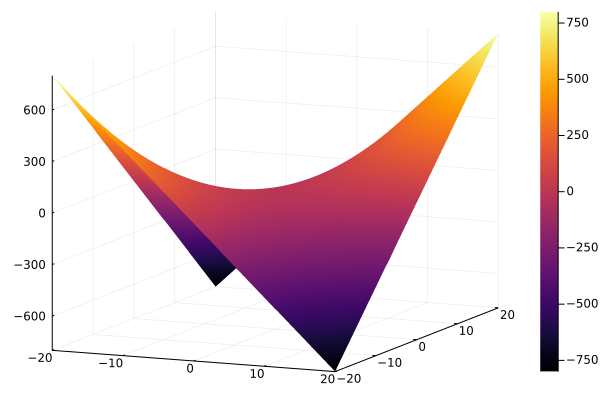

In [508]:
# f(x,y) = 2xy

# Indefinite matrix
# Surface shaped like a saddle

n = 100
ts = range(-20, stop = 20, length = n)
x = ts
y = ts
f(x,y) = 2*x*y
surface(x, y, f)

- Notes about which order terms matter
- Introduce the quadratic
- Write it as a matrix
- Test for positive definiteness
- Ellipse
- Law of inertia
- Examples

Let $F$ be a function of $n$ variables.

The Taylor series is given by

$F(x) = F(0) + F'(x) + \frac{1}{2}F''(x) + \text{ higher order terms}$

The higher order terms have no effect on the question of a local minima or maxima.
The first order derivative is used to obtain the stationary point (by setting its value to zero)
The second order derivative (which can be expressed in quadratic form) is used to determine definiteness.

The quadratic form can be written as a matrix $A$ where $a_{ij} = \frac{\partial^2 F}{\partial x_i \partial x_j}$. This is the second derivative matrix (also known as the Hessian).

If $x$ is a vector, the $x^TAx$ will give back the quadratic equation.

We have encapsulated the information we get from the second derivative in the form of a matrix $A$.

Now we have reduced the problem to relating properties of a matrix to definiteness.

The following tests provide a sufficient and necessary condition to determine if $x^TAx$ is positive definite:
- The quadratic form $x^TAx > 0$ for all non-zero vectors $x$
- All eigenvalues $\lambda_i$ of $A$ are positive
- All pivots (without row exchanges) $d_k$ of $A$ are positive
- All upper left submatrices $A_k$ have positive determinants
- There is a matrix $R$ with independent columns such that $A = R^TR$

Julia has a method `isposdef` to test for positive definiteness. Let's try it out!

In [509]:
isposdef([
        0 0;
        0 1
        ])

false

In [510]:
isposdef([
        3 3 0;
        3 10 7;
        0 7 8
        ])

true

The last test is interesting. Note that the $R$ does not need to be unique. There are several ways to find such an $R$. One technique is to try to perform a Cholesky decomposition.

The Cholesky decomposition is similar to the $LDU$ decomposition except that $L$ and $U$ are now transposes of each other.

If we extract the diagonal of $U$ out into a matrix $D$, we get the following:

$A = LDU = LDL^T = (\sqrt{D}L^T)^T(\sqrt{D}L^T) = R^TR$

In [511]:
cholesky([
        3 3 0;
        3 10 7;
        0 7 8
        ])

Cholesky{Float64,Array{Float64,2}}
U factor:
3×3 UpperTriangular{Float64,Array{Float64,2}}:
 1.73205  1.73205  0.0
  ⋅       2.64575  2.64575
  ⋅        ⋅       1.0

In [512]:
cholesky([
        0 0;
        0 1
        ])

LoadError: [91mPosDefException: matrix is not positive definite; Cholesky factorization failed.[39m

Cholesky decomposition is possible only for positive definite matrices. Julia raises a `PosDefException` to indicate that the matrix is not positive definite.

# Singular Value Decomposition

For any $m \times n$ matrix $A$ of rank $r$, the singular value decomposition of $A$ is given by

$A = U\Sigma V^T$

where $U$ is an $m \times m$ orthogonal matrix, $V$ is an $n \times n$ orthogonal matrix, and $\Sigma$ is and $m \times n$ matrix containing the $r$ singular values of $A$ along the diagonal and zero elsewhere. $V$ contains the eigenvectors of $A^TA$ and $U$ contains the eigenvectors of $AA^T$.

By convention, we arrage the singular values in descending order along the diagonal of $\Sigma$

$\sigma_1 \geq \sigma_2 \geq \ldots \sigma_r$

The singular values $\sigma_i$ are positive and non-zero. Combining this with our convetion, we get $\sigma_{i + r} = 0$ for $i \geq 1$

- $AV = \Sigma U$
- For $1 \leq i \leq r$, $Av_i = \sigma_i u_i \implies u_i = \frac{Av_i}{\sigma_i}$
- $U$ and $V$ give the orthonormal bases for each of the four fundamental bases
    - First $r$ columns of $U$ give the column space of $A$
    - Last $m - r$ columns of $U$ give the left nullspace of $A$
    - First $r$ columns of $V$ give the row space of $A$
    - Last $n - r$ columns of $V$ give the nullspace of $A$

Note that each of the $u_i$s obtained from $v_i$ are pairwise orthonormal.

For $i \neq j$ and $1 \leq i \leq r, 1 \leq j \leq r$,

\begin{align}
u_i u_j & = \left(\frac{Av_i}{\sigma_i}\right)^T \left(\frac{Av_j}{\sigma_j}\right) \\
& = \left(\frac{v_i^T A^T A v_j}{\sigma_i \sigma_j}\right) \\
& = \left(\frac{v_i^T \sigma_j^2 v_j}{\sigma_i \sigma_j}\right) \\
& = 0
\end{align}

This decomposition has a lot of interesting applications! Before we get there, let's explore the `svd` method in Julia.

In [513]:
# rank 1 matrix

A = [ -1 2 2]'

F_a = svd(A)

SVD{Float64,Float64,Adjoint{Float64,Array{Float64,2}}}
U factor:
3×1 Adjoint{Float64,Array{Float64,2}}:
 -0.33333333333333326
  0.6666666666666666
  0.6666666666666666
singular values:
1-element Array{Float64,1}:
 3.0
Vt factor:
1×1 Adjoint{Float64,Array{Float64,2}}:
 1.0

In [514]:
# rank 2

B = [
    -1 1 0;
    0 -1 1;
]

F_b = svd(B)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107
singular values:
2-element Array{Float64,1}:
 1.7320508075688772
 1.0
Vt factor:
2×3 Array{Float64,2}:
  0.408248  -0.816497     0.408248
 -0.707107  -2.78976e-16  0.707107

The first interesting thing to note from the output is the dimensions of the output matrices. In the definition, we said that $U$, $\Sigma$, and $V^T$ are $m \times m$, $m \times n$, and $n \times n$ matrices respectively.

For $A$, the $U$ matrix is $3 \times 1$ (instead of $3 \times 3$). Similarly, for $B$, the $V^T$ matrix is $2 \times 3$ (instead of $3 \times 3$).

Let's first check if the factorizations are correct

In [515]:
A ≈ F_a.U * diagm(F_a.S) * F_a.Vt

true

In [516]:
B ≈ F_b.U * diagm(F_b.S) * F_b.Vt

true

The factorizations are correct! So why are the dimensions different?

It turns out that to optimize for space, implementations of SVD use a reduced form in which only the most essential information is stored.

The SVD factorization can be written as:

$A = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \ldots + \sigma_r u_r v_r^T + \sigma_{r+1} u_{r+1} v_{r+1}^T \ldots$

But, $\sigma_{i+r} = 0$, for $i \geq 1$. Therefore, we can rewrite $A$ as

$A = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \ldots + \sigma_r u_r v_r^T$

In other words, for the above equation, $U$ is $m \times r$, $\Sigma$ is $r \times r$, and $V^T$ is $r \times n$. We do not need to store the rest of the columns of $U$ and $V^T$ because in the factorization they multiply with a zero and thus cancel out.

Now the dimensions make sense!

One disadvantage of using the reduced format is that $U$ and $V$ are no longer square orthogonal matrices. This means we cannot use $UU^T = U^TU = I$ and $VV^T = V^TV = I$ in calculations.

In [517]:
# Fibonacci matrix

A  = [
    1 1;
    1 0
]

svd(A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
2×2 Array{Float64,2}:
 -0.850651  -0.525731
 -0.525731   0.850651
singular values:
2-element Array{Float64,1}:
 1.618033988749895
 0.6180339887498948
Vt factor:
2×2 Array{Float64,2}:
 -0.850651  -0.525731
  0.525731  -0.850651

In [518]:
# Zero matrix

A = zeros(3,4)

svd(A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
singular values:
3-element Array{Float64,1}:
 0.0
 0.0
 0.0
Vt factor:
3×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0

In general, for the $m \times n$ zero matrix, the SVD will be $U = I_m$, $V = I_n$, and $\Sigma = \mathbf{0}_{m \times n}$

# Visualizing positive definite matrices as ellipsoids

Let $A$ be an $m \times n$ real symmetric positive definite matrix. Then, there exists the spectral decomposition such that $A = Q\Lambda Q^T$

$x^TAx = x^T Q \Lambda Q^T x = y^T \Lambda y = \lambda_1 y_1^2 + \lambda_2 y_2^2 + \ldots \lambda_n y_n^2$

This is the equation of an ellipsoid with axis lengths $\frac{1}{\lambda_1}, \frac{1}{\lambda_2}, \ldots, \frac{1}{\lambda_n}$

In [519]:
function ellipsoid(rx, ry, rz)
    ngrid = 100
    u = range(0, 2π, length=ngrid)
    v = range(0, π, length=ngrid)
    
    x = [rx * x * y for (x, y) in  Iterators.product(cos.(u), sin.(v))]
    y = [ry * x * y for (x, y) in Iterators.product(sin.(u), sin.(v))]
    z = [rz * x * y for (x, y) in Iterators.product(ones(length(u)), cos.(v))]
    
    plot(vec(x), vec(y), vec(z))
end

function ellipse(rx, ry)
    n = 100
    ts = range(0, 4π, length = n)
    
    xs = rx * cos.(ts)
    ys = ry * sin.(ts)
    
    plot(xs, ys)
end

ellipse (generic function with 1 method)

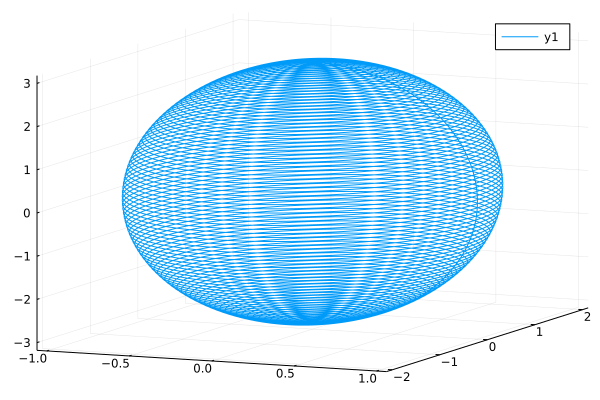

In [520]:
A = [
    2 -1 0;
    -1 2 0;
    0 -1 2
]

vals = eigvals(A)
ellipsoid(vals...)

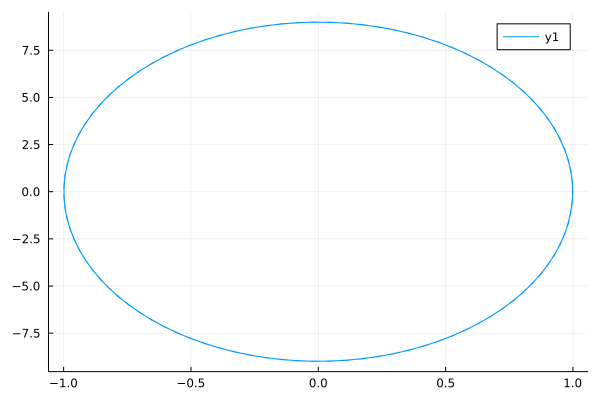

In [521]:
A = [
    5 4;
    4 5
]

vals = eigvals(A)
ellipse(vals...)

# Applications of SVD

## Image Compression

An image is nothing but an $m \times n$ matrix of real values. If we were to store the image as is, it would result in a space complexity of $O(mn)$. However, we don't need to store all of the information to maintain the fidelity of the image. This is where compression comes in to play.

One simple way to compress an image is to use the SVD and only use the first $k$ singular values (and zero out the rest). This can save space as the compressed size $\approx m \times k + k + k \times n$.

In [522]:
using Images

In [523]:
function compress(img, precision)
    F = svd(img)
    F.S[precision:length(F.S)] .= 0
    return F.U * diagm(F.S) * F.Vt
end

compress (generic function with 1 method)

### Grayscale image

In [524]:
precision_ranges = [2, 5, 10, 20, 30, 75, 100]

7-element Array{Int64,1}:
   2
   5
  10
  20
  30
  75
 100

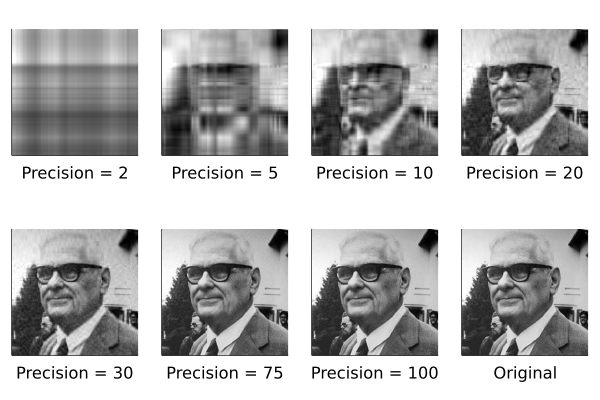

In [525]:
img = Gray.(load("assets/alonzo_church.jpeg"))
plots = []
errors = []

for p in precision_ranges
    compressed_image = Gray.(compress(img, p))
    push!(errors, sum((img .- compressed_image).^2))
    push!(plots, plot(
            compressed_image, 
            xlabel="Precision = " * string(p),
            xticks=false,
            yticks=false))
end

push!(plots, plot(img, xlabel="Original", xticks=false, yticks=false))
    

plot(plots..., layout=(2,4))

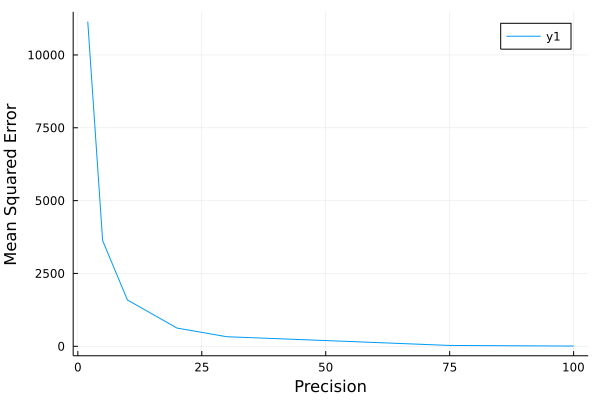

In [526]:
plot(precision_ranges, Float32.(errors), xlabel="Precision", ylabel="Mean Squared Error", st=:line)

## Principal Component Analysis

Principal component analysis (PCA) is a statistical technique used to re-interpret data performing a basis transformation. The basis transformation is carried out in such a way that the first basis vector is the best fit line and the rest of the vectors are orthogonal to it. The basis vectors are arranged so that the first basis vector encodes a direction in which the variance is the largest, the second basis vector encodes the direction in which the variance is the second largest and so on.

PCA is often used for data re-interpretation and dimensionality reduction. With PCA you are able to capture which features of your data set are more important and capture most of the variance.

Internally, the PCA uses the SVD to compute the basis vectors. The singular values are used to figure out the proportion of variation contributed by the corresponding eigenvector.

Here is an outline of the PCA algorithm:

TODO outline

Here is an example of using PCA on a dataset. We will be using a library method for doing the PCA and will be doing it on the Iris dataset.

In [527]:
using MultivariateStats, RDatasets

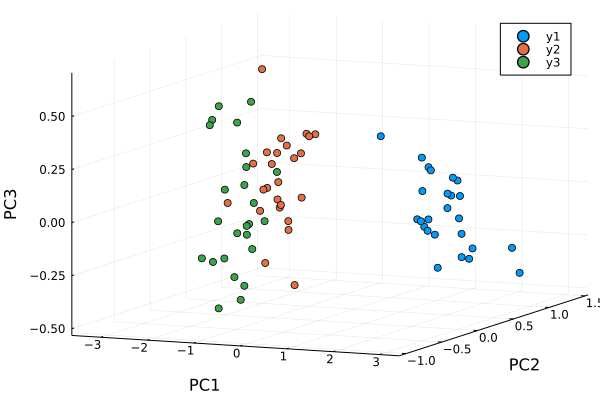

In [528]:
# the following snippet is adapted from https://multivariatestatsjl.readthedocs.io/en/stable/pca.html

iris = dataset("datasets", "iris")

# Split into training and test sets
Xtr = Matrix(iris[1:2:end,1:4])'
Xtr_labels = iris[1:2:end, 5]

Xte = Matrix(iris[2:2:end, 1:4])'
Xte_labels = iris[2:2:end, 5]

# train a PCA model, allowing up to 3 dimensions
M = fit(PCA, Xtr; maxoutdim=3)

# apply PCA model to testing set
Yte = MultivariateStats.transform(M, Xte)

setosa = Yte[:, Xte_labels.=="setosa"]
versicolor = Yte[:, Xte_labels.=="versicolor"]
virginica = Yte[:, Xte_labels.=="virginica"]

# visualize first 3 principal components in 3D interacive plot
p = scatter(setosa[1,:],setosa[2,:],setosa[3,:],marker=:circle,linewidth=0)
scatter!(p, versicolor[1,:],versicolor[2,:],versicolor[3,:],marker=:circle,linewidth=0)
scatter!(p, virginica[1,:],virginica[2,:],virginica[3,:],marker=:circle,linewidth=0)
plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3")

## Polar Decomposition

Intuitively, the polar decomposition lets you decompose a matrix into a stretching matrix and a rotation matrix. This is similar to the polar representation of a complex number $k = r e^{i\theta}$.

The polar decomposition of an $m \times n$ matrix is defined as

$A = QS$

where $Q$ is an orthogonal matrix and $S$ is a symmetric positive definite matrix.

$Q$ encodes the rotation or reflection and $S$ encodes the stretching.

We can obtain $Q$ and $S$ from the SVD of $A$

$A = U\Sigma V^T = U(V^TV)\Sigma V^T = (UV^T)(V \Sigma V^T) = QS$

We are using the fact that $V^TV = I$.

In [529]:
function polar_decomp(A)
    U, S, V = svd(A)
    return U*V', V*diagm(S)*V'
end

polar_decomp (generic function with 1 method)

In [530]:
A = [
    1 -2;
    3 -1
]

Q, S = polar_decomp(A)

display(round.(Q))
display(S)

2×2 Array{Float64,2}:
 0.0  -1.0
 1.0   0.0

2×2 Array{Float64,2}:
  3.0  -1.0
 -1.0   2.0

In [531]:
A ≈ Q * S

true

In [532]:
function view_transformation_on_rect(A, message)
    xs = [0, 0, 1, 1, 0]
    ys = [0, 1, 1, 0, 0]

    input = hcat(xs, ys)
    p = plot(xs, ys)

    output = hcat([A * input[i, :] for i in 1:5]...)'
    new_xs, new_ys = output[:, 1], output[:,2]

    plot!(p, new_xs, new_ys, title=message)
end

view_transformation_on_rect (generic function with 1 method)

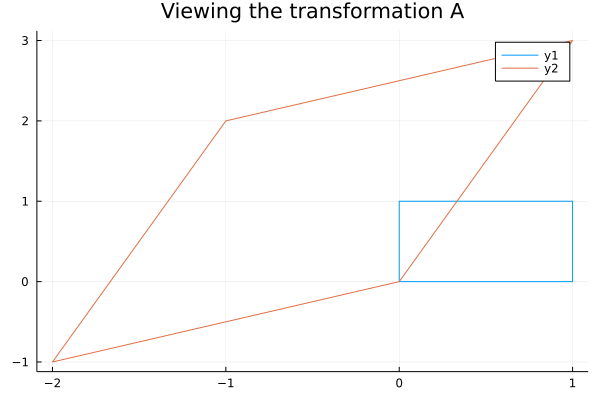

In [533]:
view_transformation_on_rect(A, "Viewing the transformation A")

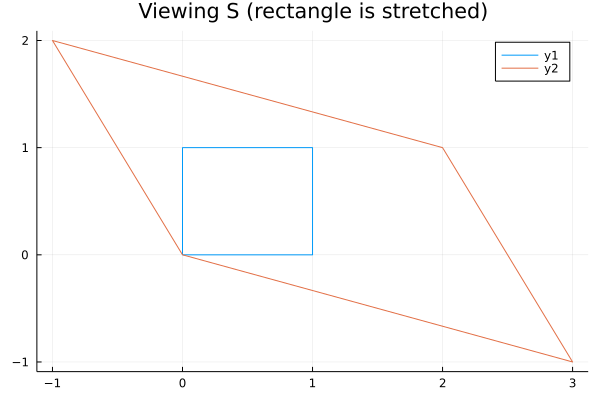

In [534]:
view_transformation_on_rect(S, "Viewing S (rectangle is stretched)")

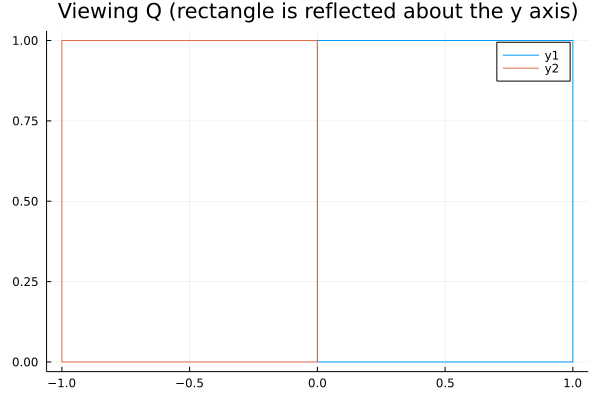

In [535]:
view_transformation_on_rect(Q, "Viewing Q (rectangle is reflected about the y axis)")

## Least squares and pseudoinverse

Earlier we took a look at least squares. An important restriction was that the matrix $A$ must have independent columns. If $A$ has dependent columns, then $A^TA$ is not invertible and we cannot compute the least squares solution.

Using the SVD we can compute the *pseudoinverse* of a matrix! We saw earlier the four fundamental spaces of linear algebra. If we restrict the transformation encoded by matrix $A$ to only go from the column space to the row space, then we can define a unique inverse. This inverse if nothing but the pseudoinverse.

The pseudoinverse is defined in terms of the SVD matrix.

We define 

$\Sigma^+ = \begin{bmatrix}\frac{1}{\sigma_1} & & & \\ & \ddots & & \\ & & \frac{1}{\sigma_r} & \\ & & & & \end{bmatrix}$

Then the pseudoinverse $A^+$ of any $m \times n$ matrix $A$ is given by

$A^+ = V \Sigma^+ U^T$

Using the pseudoinverse, the least squares solution is now

$x^+ = A^+b$

In [536]:
# Let's try to best fit a plane f(t,z) = C + Dt + Ez

A = [
    1 0 0;
    1 0 0;
    1 1 1
]

b = [
    0
    2
    2
]

3-element Array{Int64,1}:
 0
 2
 2

In [537]:
x = A \ b

LoadError: [91mLAPACKException(2)[39m

In [538]:
A_plus = pinv(A)

3×3 Array{Float64,2}:
  0.5    0.5   -5.55112e-17
 -0.25  -0.25   0.5
 -0.25  -0.25   0.5

In [539]:
x = A_plus * b

3-element Array{Float64,1}:
 0.9999999999999997
 0.5
 0.5

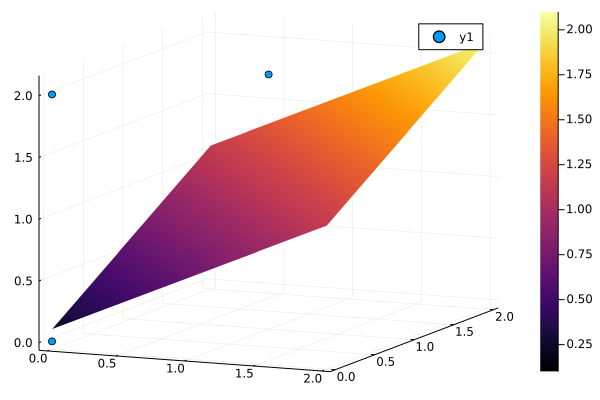

In [540]:
p = plot([0, 0, 1], [0, 0, 1], [0, 2, 2], st=:scatter)
xs = range(0, 2, length=10)
ys = range(0, 2, length=10)
f(x,y) = 0.1 + 0.5 * x + 0.5 * y
plot!(p, xs, ys, f, st=:surface)